# Vizualization:
    - Heat mapa
    

## Important libraries

In [2]:
from scipy.spatial import distance
from sklearn import manifold
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import jaccard_score
from matplotlib.colors import ListedColormap

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw

#from scripts import visualization
import importlib as imp

# Import knihoven
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import time
#imp.reload(visualization)

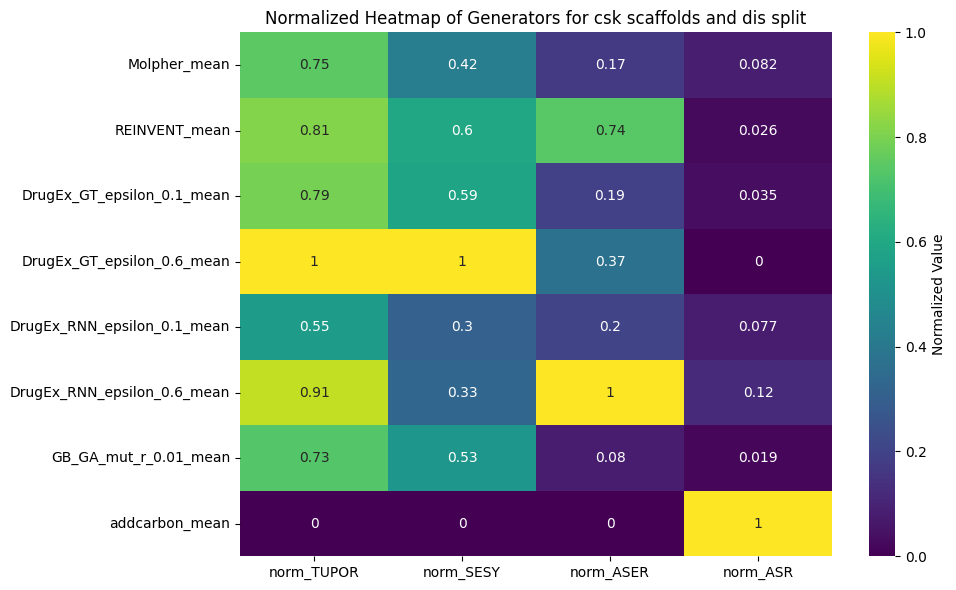

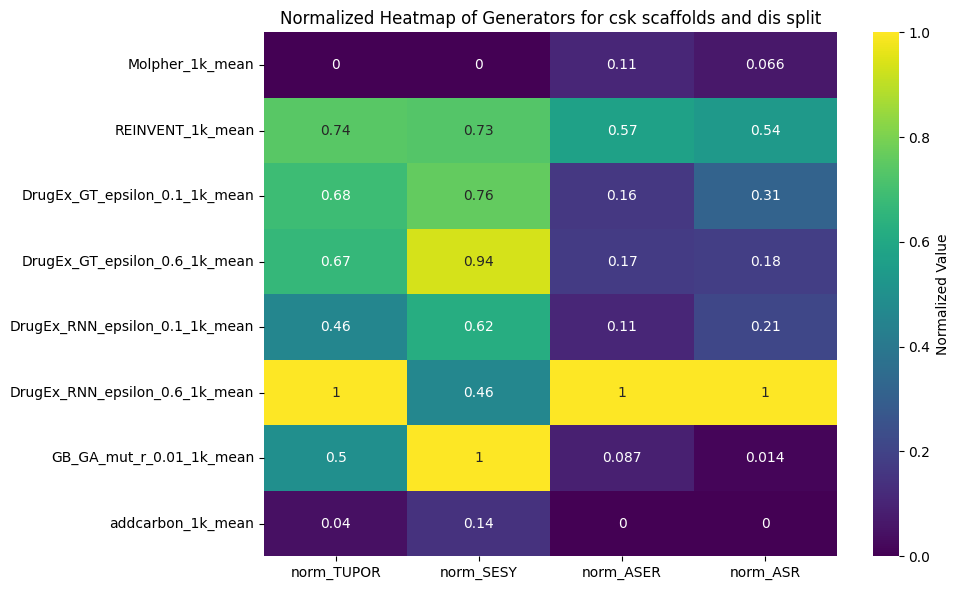

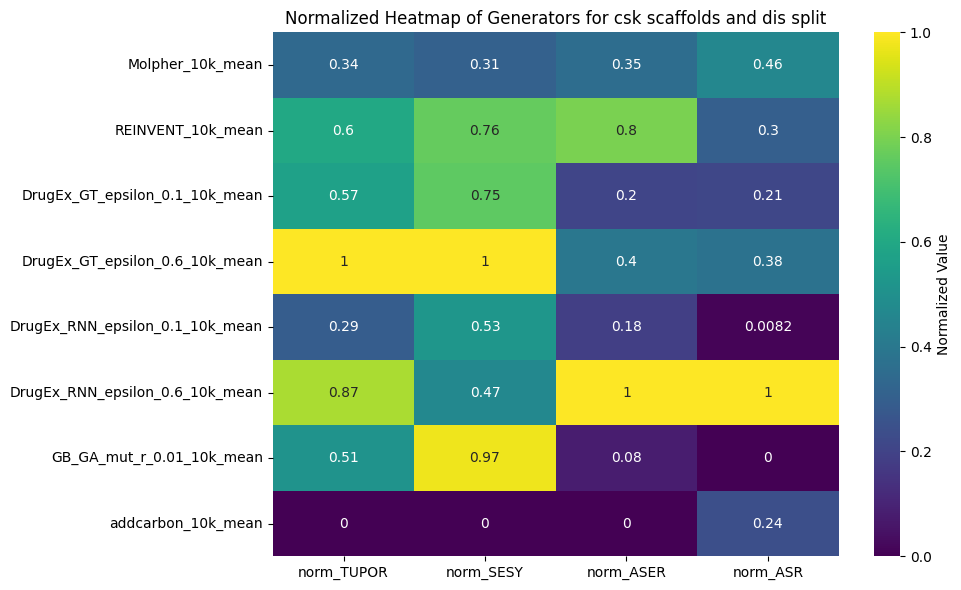

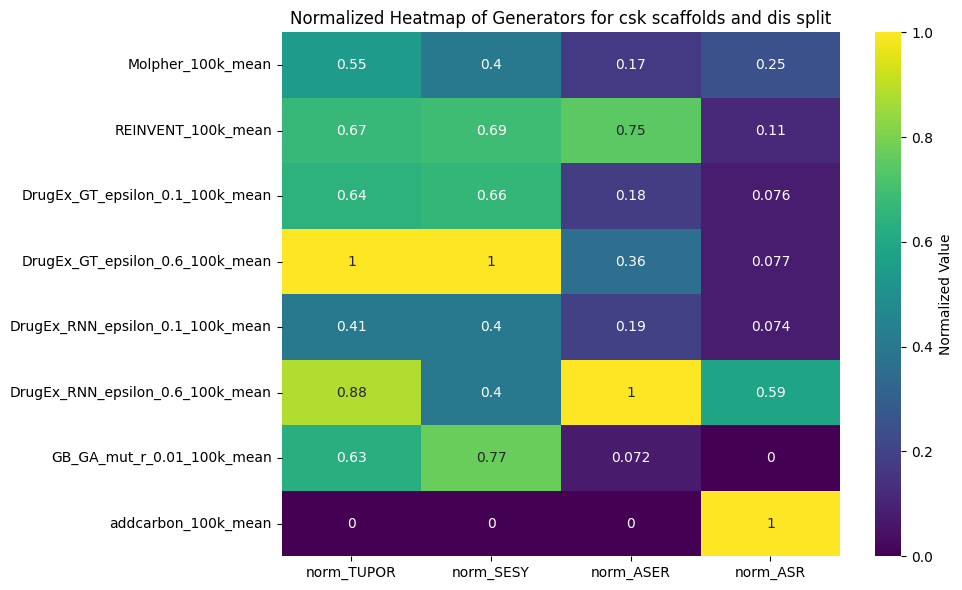

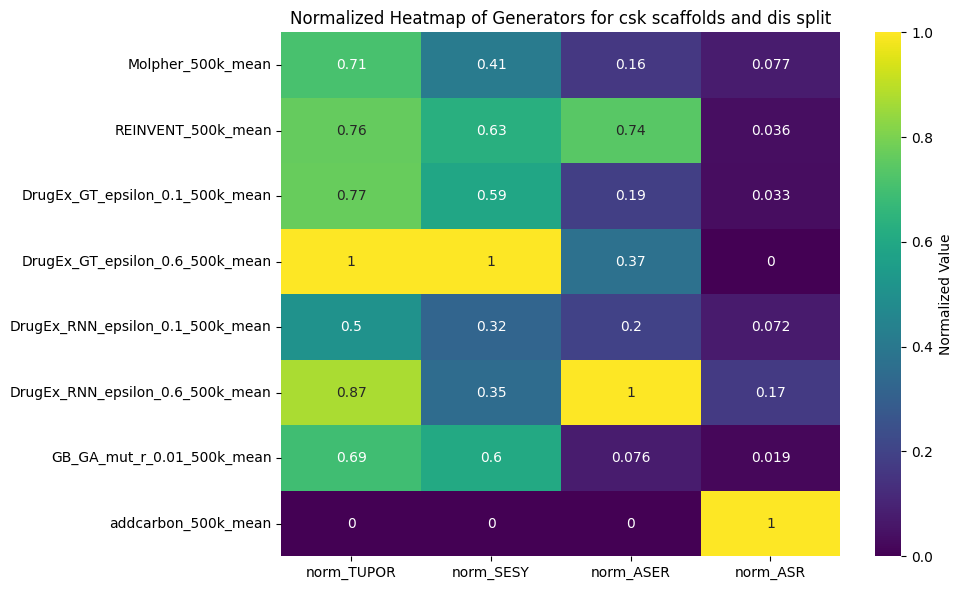

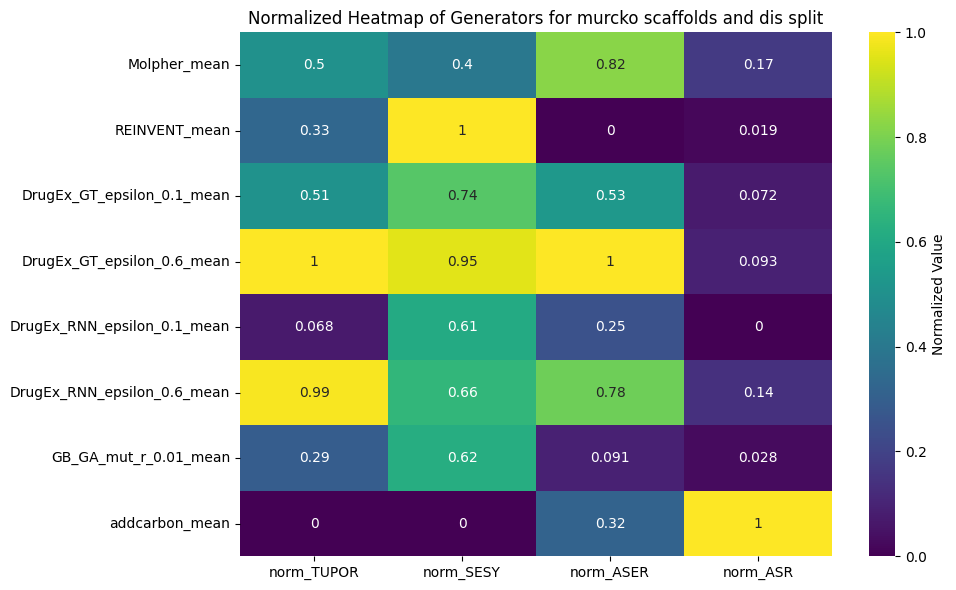

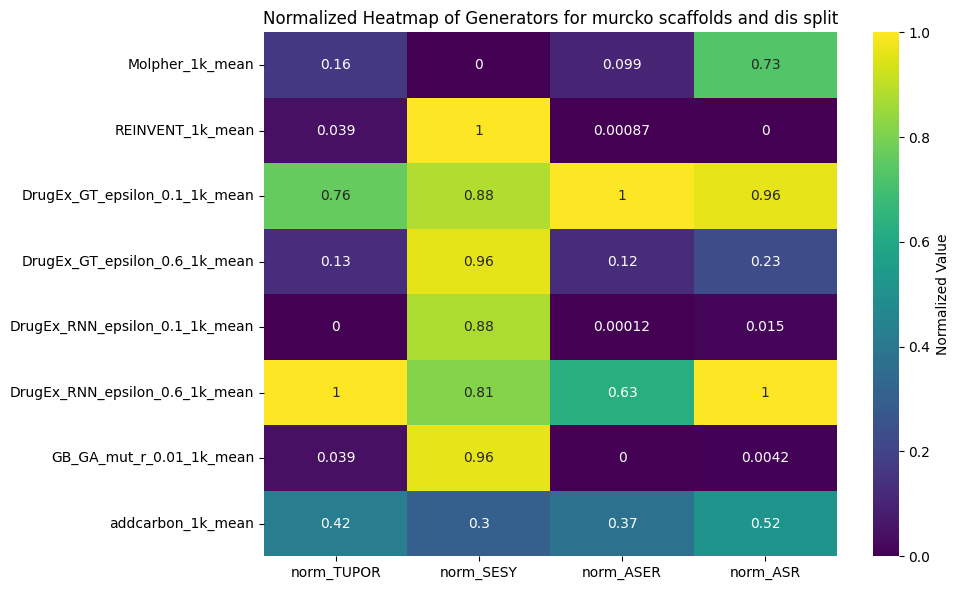

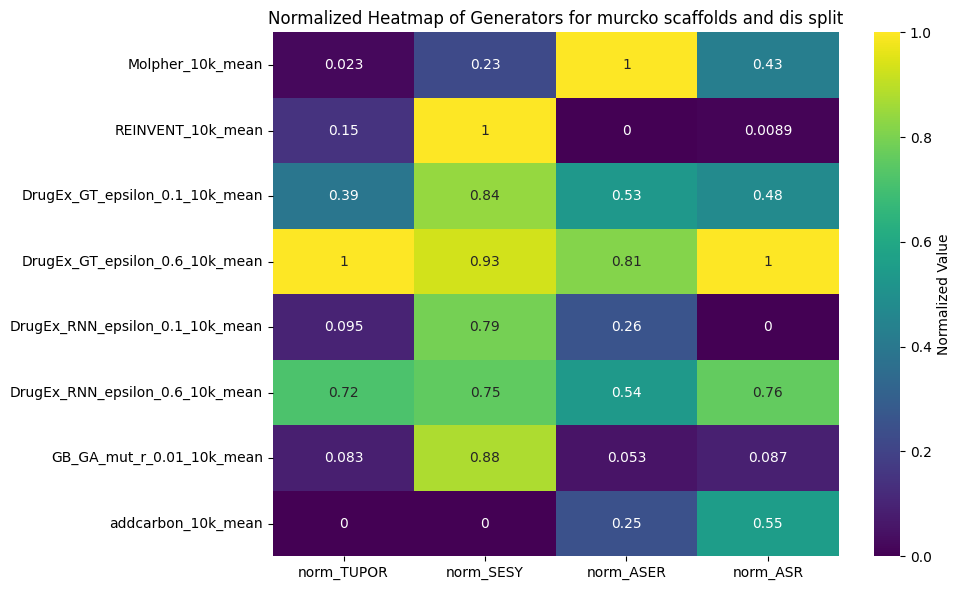

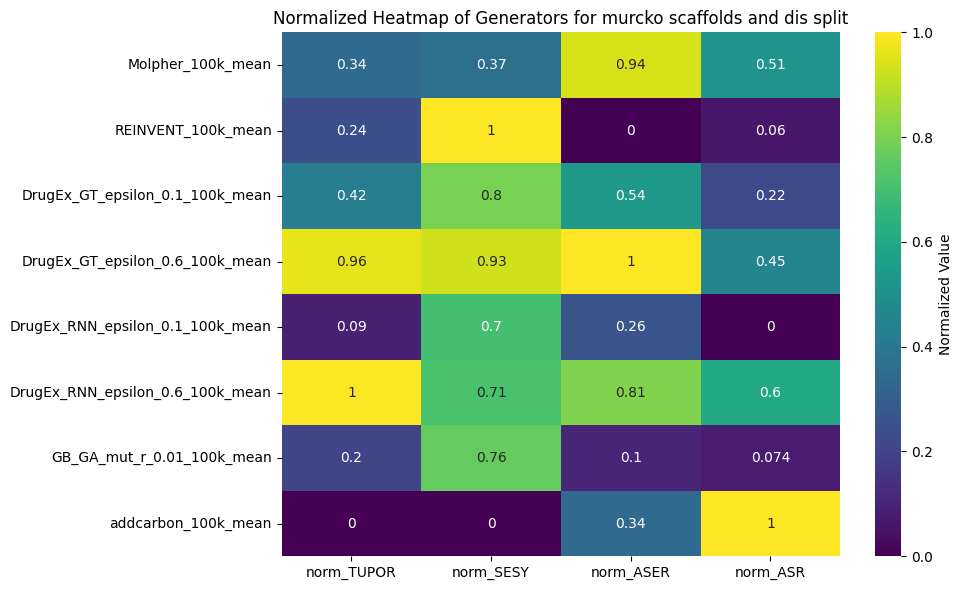

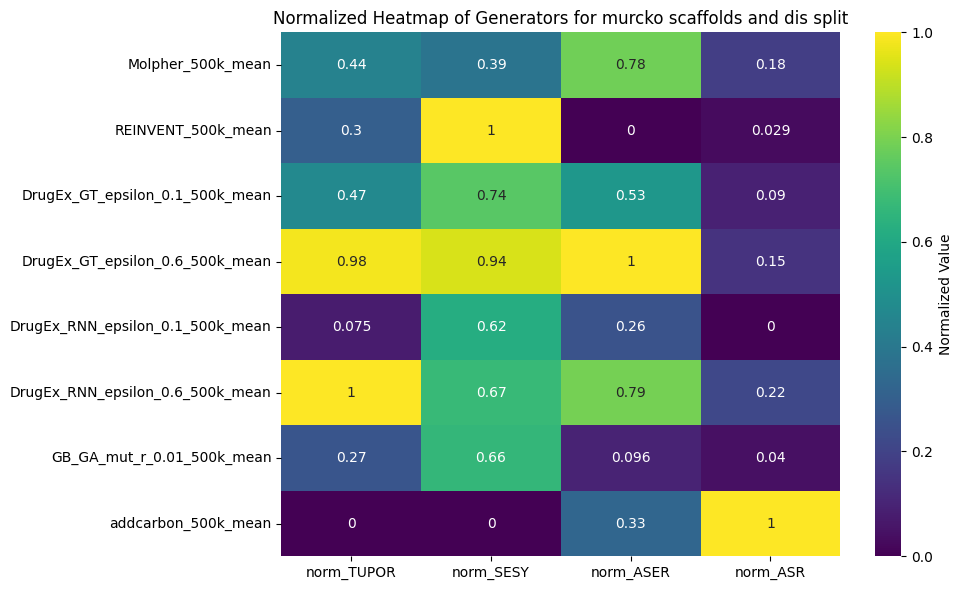

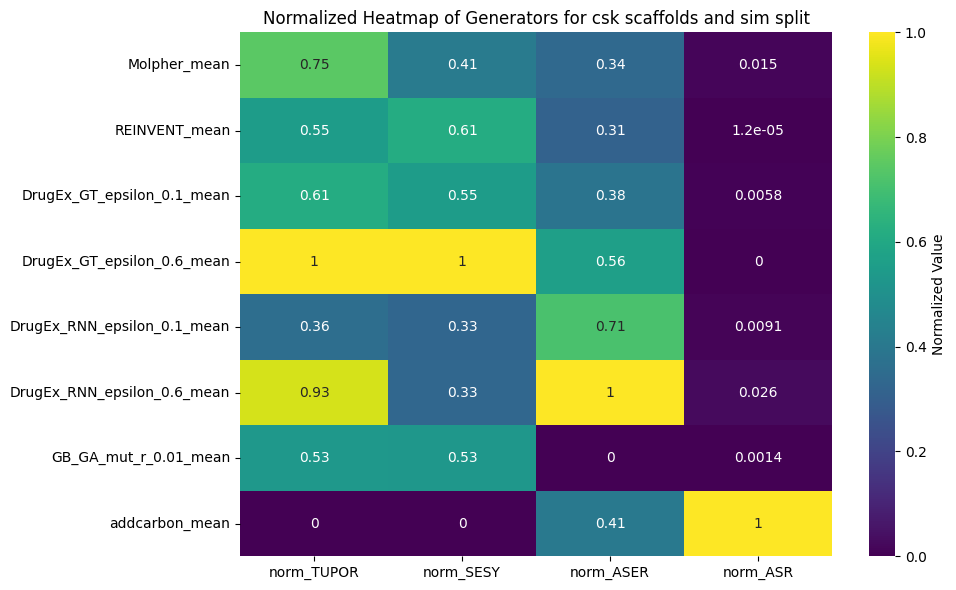

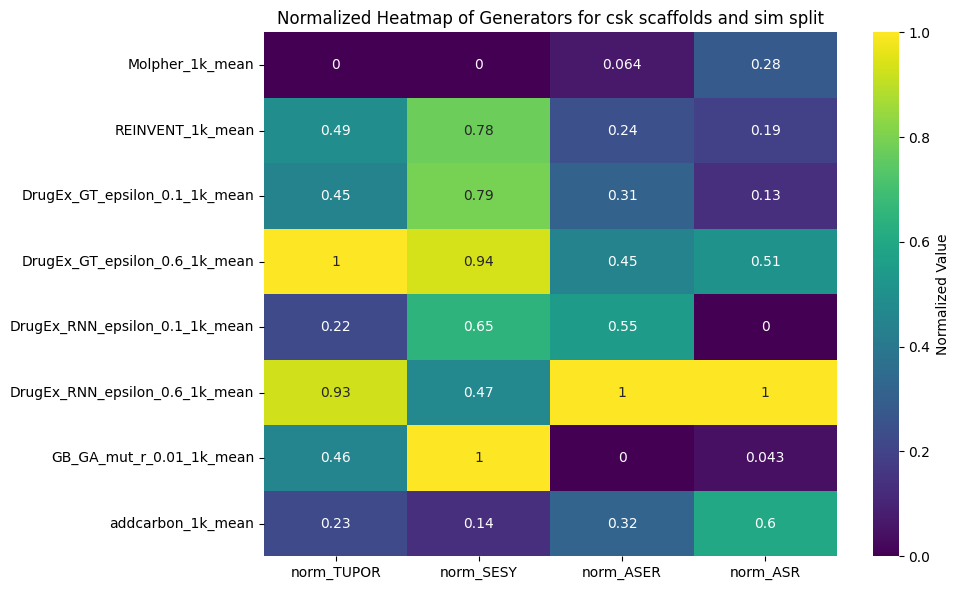

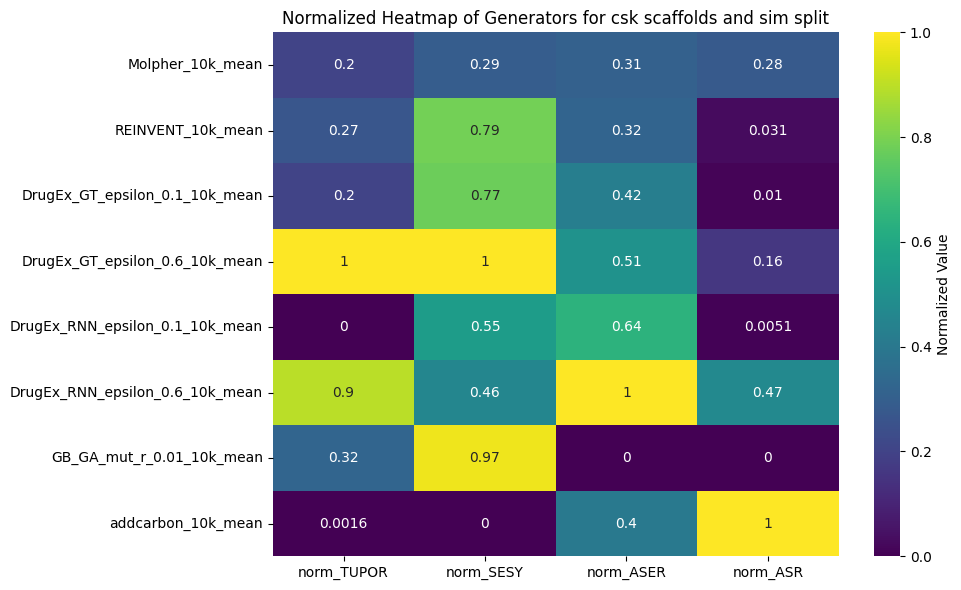

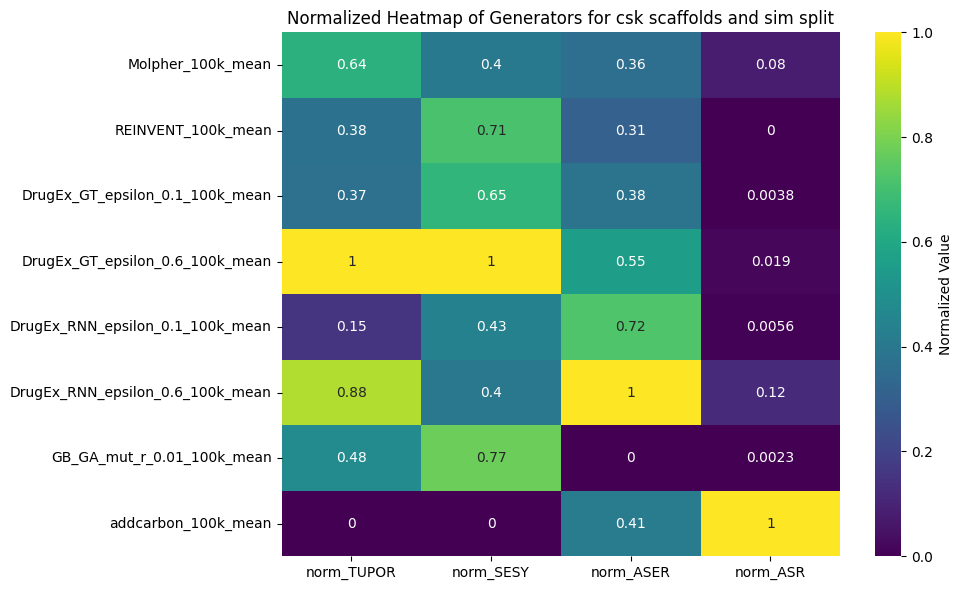

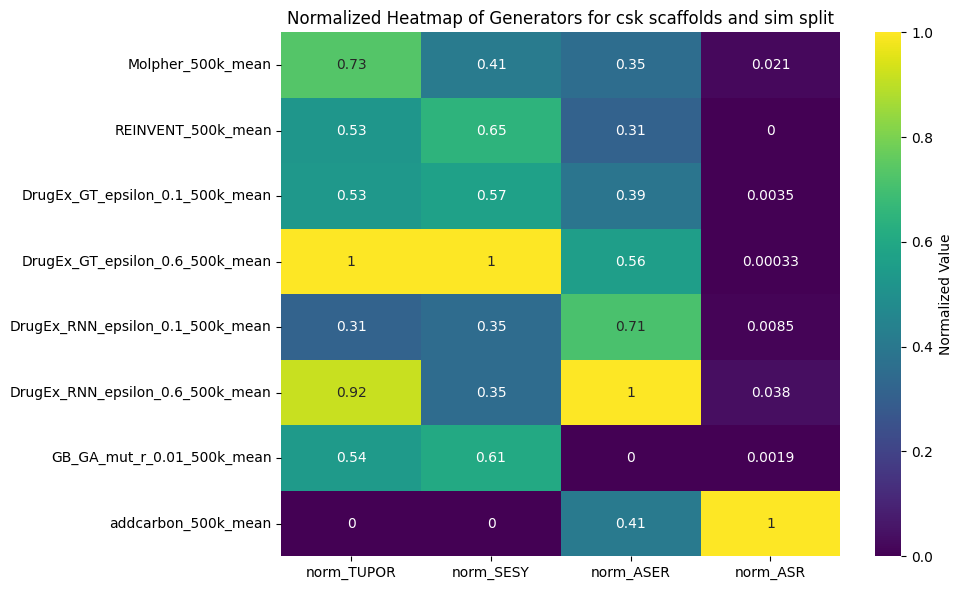

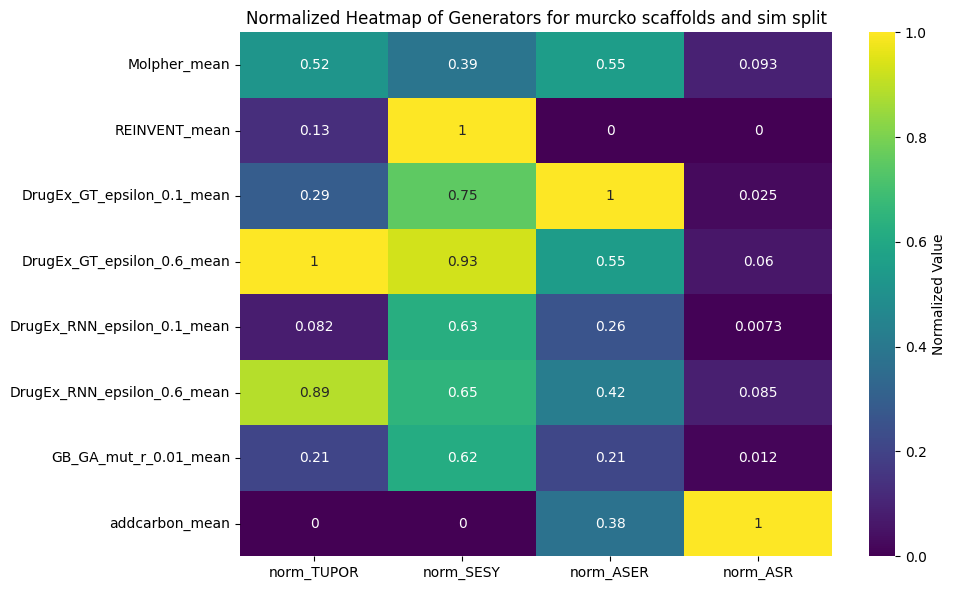

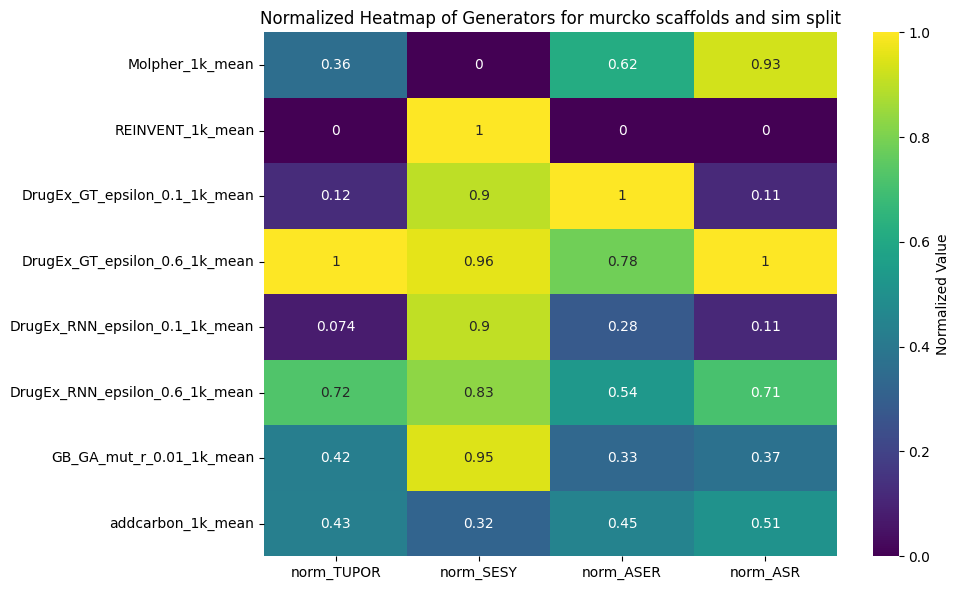

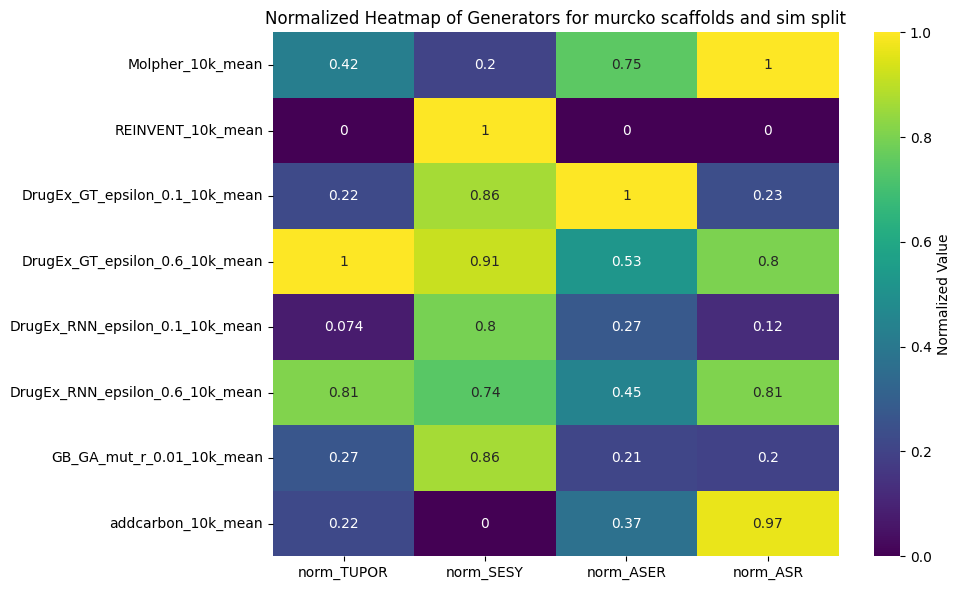

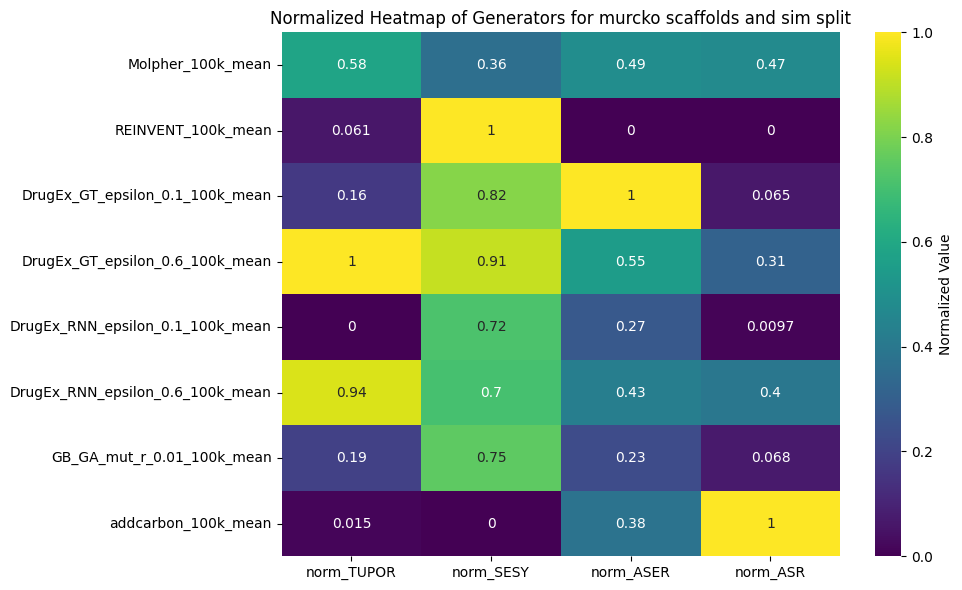

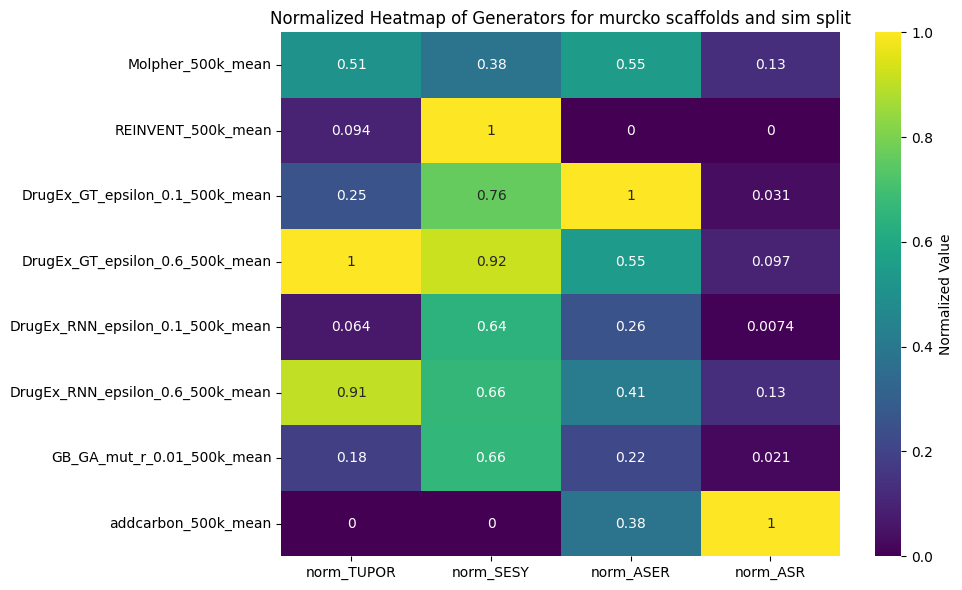

In [2]:
for type_split in ['dis','sim']:
    for scaf in ['csk', 'murcko']:
        for _ in ['','_1k', '_10k', '_100k', '_500k']:
            df = pd.read_csv(f"data/results/Glucocorticoid_receptor/{scaf}_scaffolds/{type_split}/mean_{scaf}_{type_split}{_}.csv")
    
            df['norm_TUPOR'] =  df['TUPOR'].apply(lambda x: (x - df['TUPOR'].min()) / (df['TUPOR'].max() - df['TUPOR'].min()))
            df['norm_SESY'] =  df['SESY'].apply(lambda x: (x - df['SESY'].min()) / (df['SESY'].max() - df['SESY'].min()))
            df['norm_ASER'] =  df['ASER'].apply(lambda x: (x - df['ASER'].min()) / (df['ASER'].max() - df['ASER'].min()))
            df['norm_ASR'] = df['ASR'].apply(lambda x: (x - df['ASR'].min()) / (df['ASR'].max() - df['ASR'].min()))
            
            normalized_df = df[[ 'norm_TUPOR', 'norm_SESY', 'norm_ASER', 'norm_ASR']]
            normalized_df.index = df.name.tolist()
            
            
            plt.figure(figsize=(10, 6))
            sns.heatmap(normalized_df, annot=True, cmap='viridis', cbar_kws={'label': 'Normalized Value'})
            plt.title(f'Normalized Heatmap of Generators for {scaf} scaffolds and {type_split} split')
    
            plt.tight_layout()
            plt.savefig(f'img/heat_mapa/heat_mapa_{type_split}_{scaf}_{_}.png')
            plt.savefig(f"img/heat_mapa/heat_mapa_{type_split}_{scaf}_{_}.svg", format="svg")
            plt.show()
    

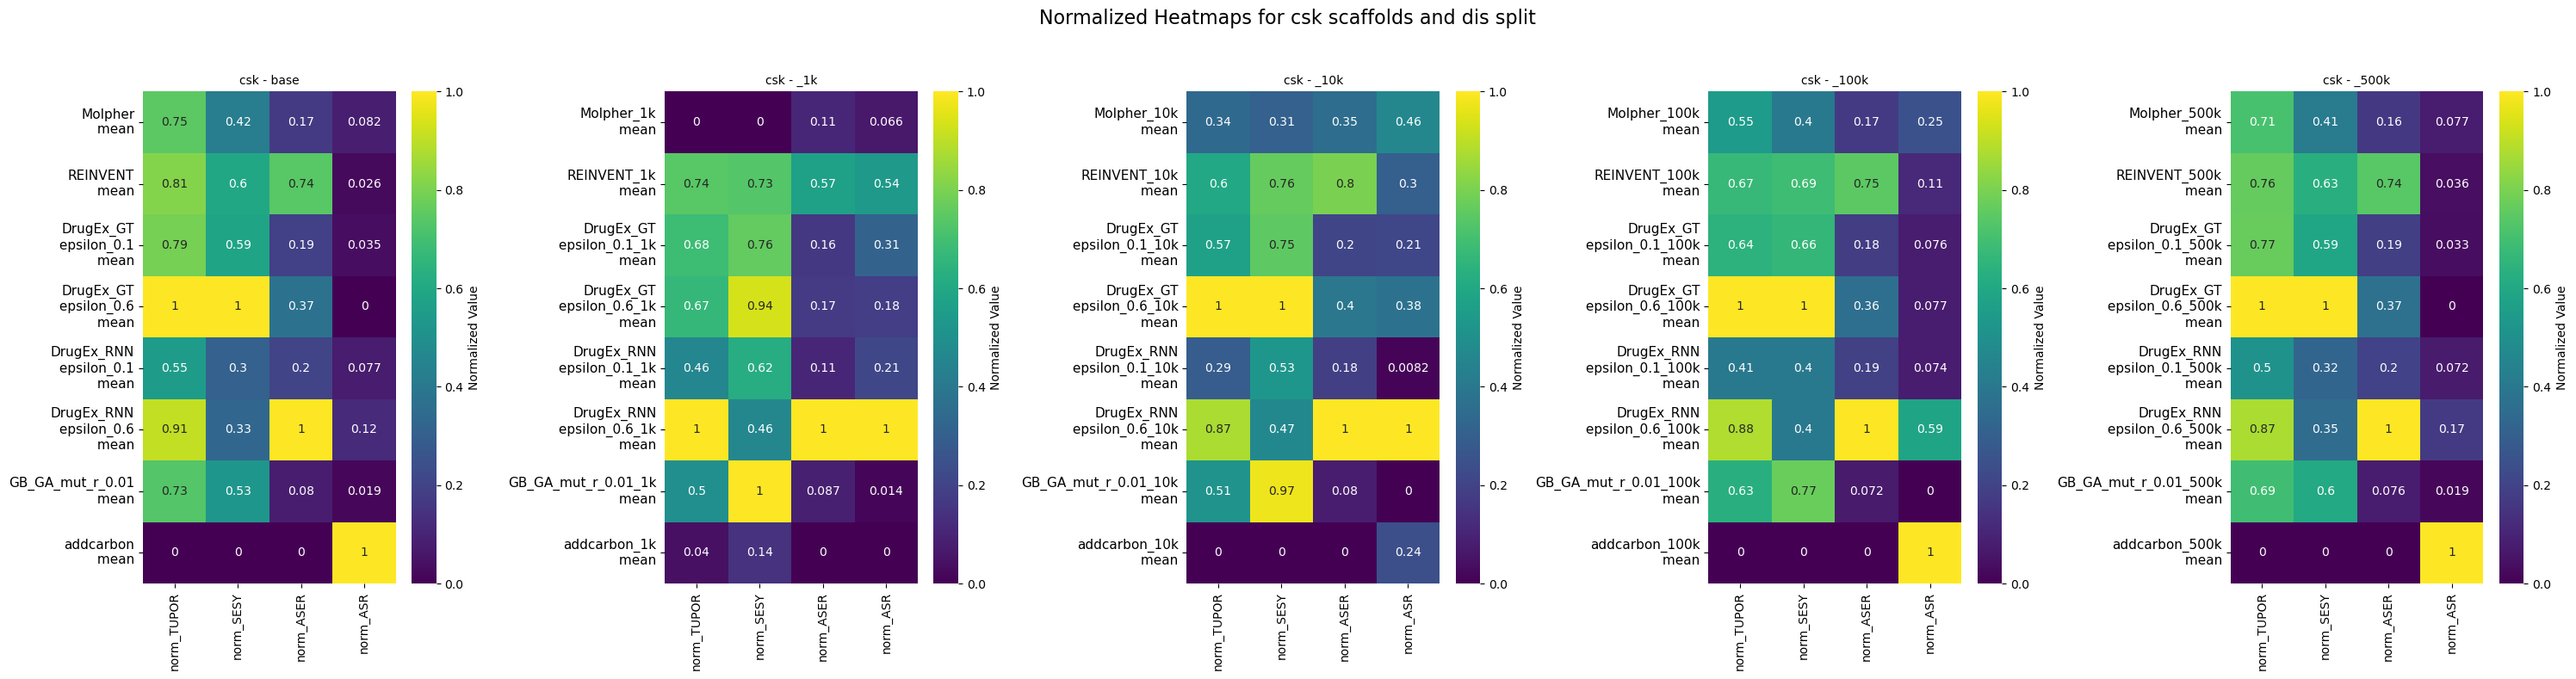


KeyboardInterrupt



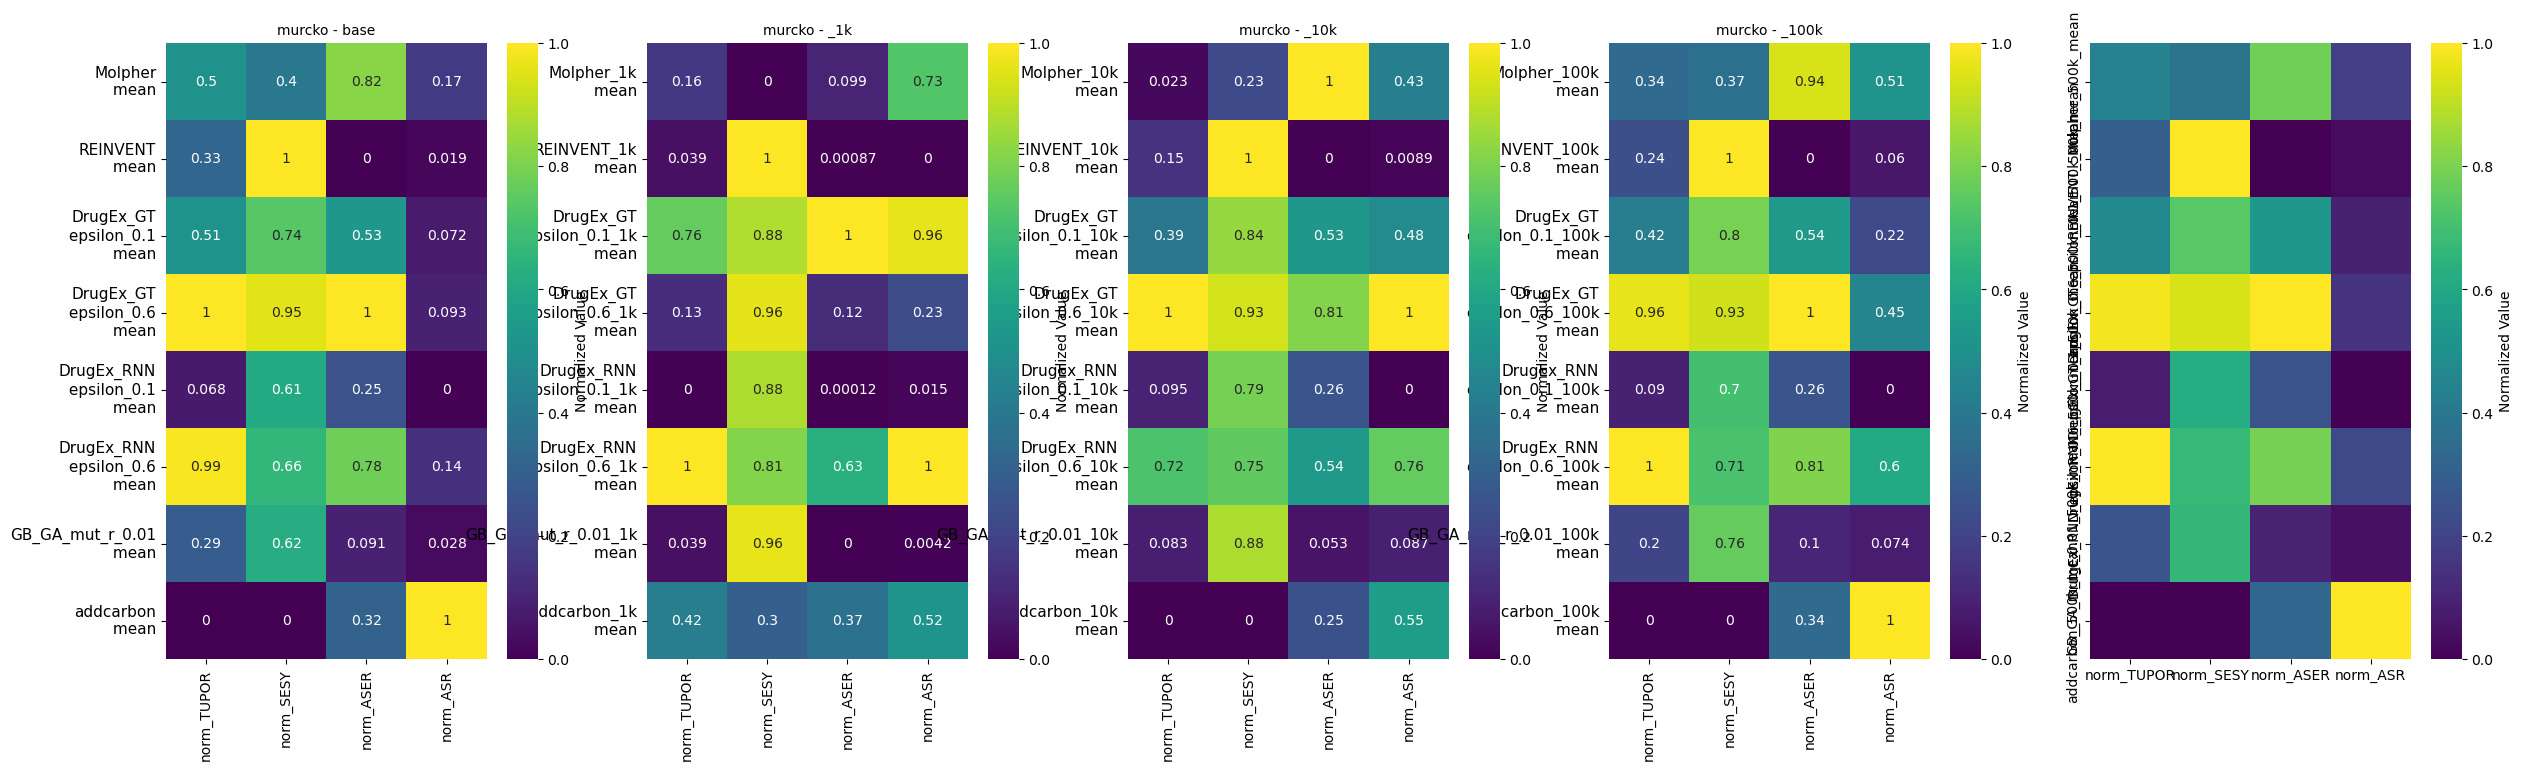

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Iterace přes typy rozdělení (DIS, SIM) a scaffoldy (CSK, Murcko)
for type_split in ['dis', 'sim']:
    for scaf in ['csk', 'murcko']:
        # Vytvoření figure pro subploty (1 řádek a 5 sloupců pro subsety)
        fig, axes = plt.subplots(1, 5, figsize=(30, 8))  # 1 řádek, 5 sloupců pro subsety

        # Iterace přes subsety (base, 1k, 10k, 100k, 500k)
        for k, subset in enumerate(['', '_1k', '_10k', '_100k', '_500k']):
            # Načtení datového rámce
            df = pd.read_csv(f"data/results/Glucocorticoid_receptor/{scaf}_scaffolds/{type_split}/mean_{scaf}_{type_split}{subset}.csv")
            
            # Normalizace metrik
            df['norm_TUPOR'] = df['TUPOR'].apply(lambda x: (x - df['TUPOR'].min()) / (df['TUPOR'].max() - df['TUPOR'].min()))
            df['norm_SESY'] = df['SESY'].apply(lambda x: (x - df['SESY'].min()) / (df['SESY'].max() - df['SESY'].min()))
            df['norm_ASER'] = df['ASER'].apply(lambda x: (x - df['ASER'].min()) / (df['ASER'].max() - df['ASER'].min()))
            df['norm_ASR'] = df['ASR'].apply(lambda x: (x - df['ASR'].min()) / (df['ASR'].max() - df['ASR'].min()))
            
            # Výběr normalizovaných sloupců
            normalized_df = df[['norm_TUPOR', 'norm_SESY', 'norm_ASER', 'norm_ASR']]
            normalized_df.index = df.name.tolist()  # Použití názvů jako index
            
            # Výběr správného subplotu pro zobrazení
            ax = axes[k]  # Umístění v mřížce 1x5 pro subsety (1 řádek, 5 sloupců)
            
            # Vykreslení heatmapy pro každý subset
            sns.heatmap(normalized_df, annot=True, cmap='viridis', cbar_kws={'label': 'Normalized Value'}, ax=ax)
            
            # Nastavení názvu s zalomením textu pro generátory a zmenšení písma
            ax.set_title(f'{scaf} - {subset if subset else "base"}', fontsize=10, wrap=True)

            # Zalomit názvy generátorů na ose Y
            new_labels = [label.get_text().replace('_epsilon', '\n epsilon').replace('_mean', '\n mean') for label in ax.get_yticklabels()]
            ax.set_yticklabels(new_labels, rotation=0, ha="right", fontsize=11)

        # Přidání celkového názvu pro rozdělení (DIS nebo SIM)
        fig.suptitle(f'Normalized Heatmaps for {scaf} scaffolds and {type_split} split', fontsize=16)
        
        # Přizpůsobení rozložení a uložení obrázku
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Rezerva pro nadpis
        plt.savefig(f'img/heat_mapa/heat_mapa_{type_split}_{scaf}_1x5.png')
        plt.savefig(f"img/heat_mapa/heat_mapa_{type_split}_{scaf}_1x5.svg", format="svg")
        plt.show()


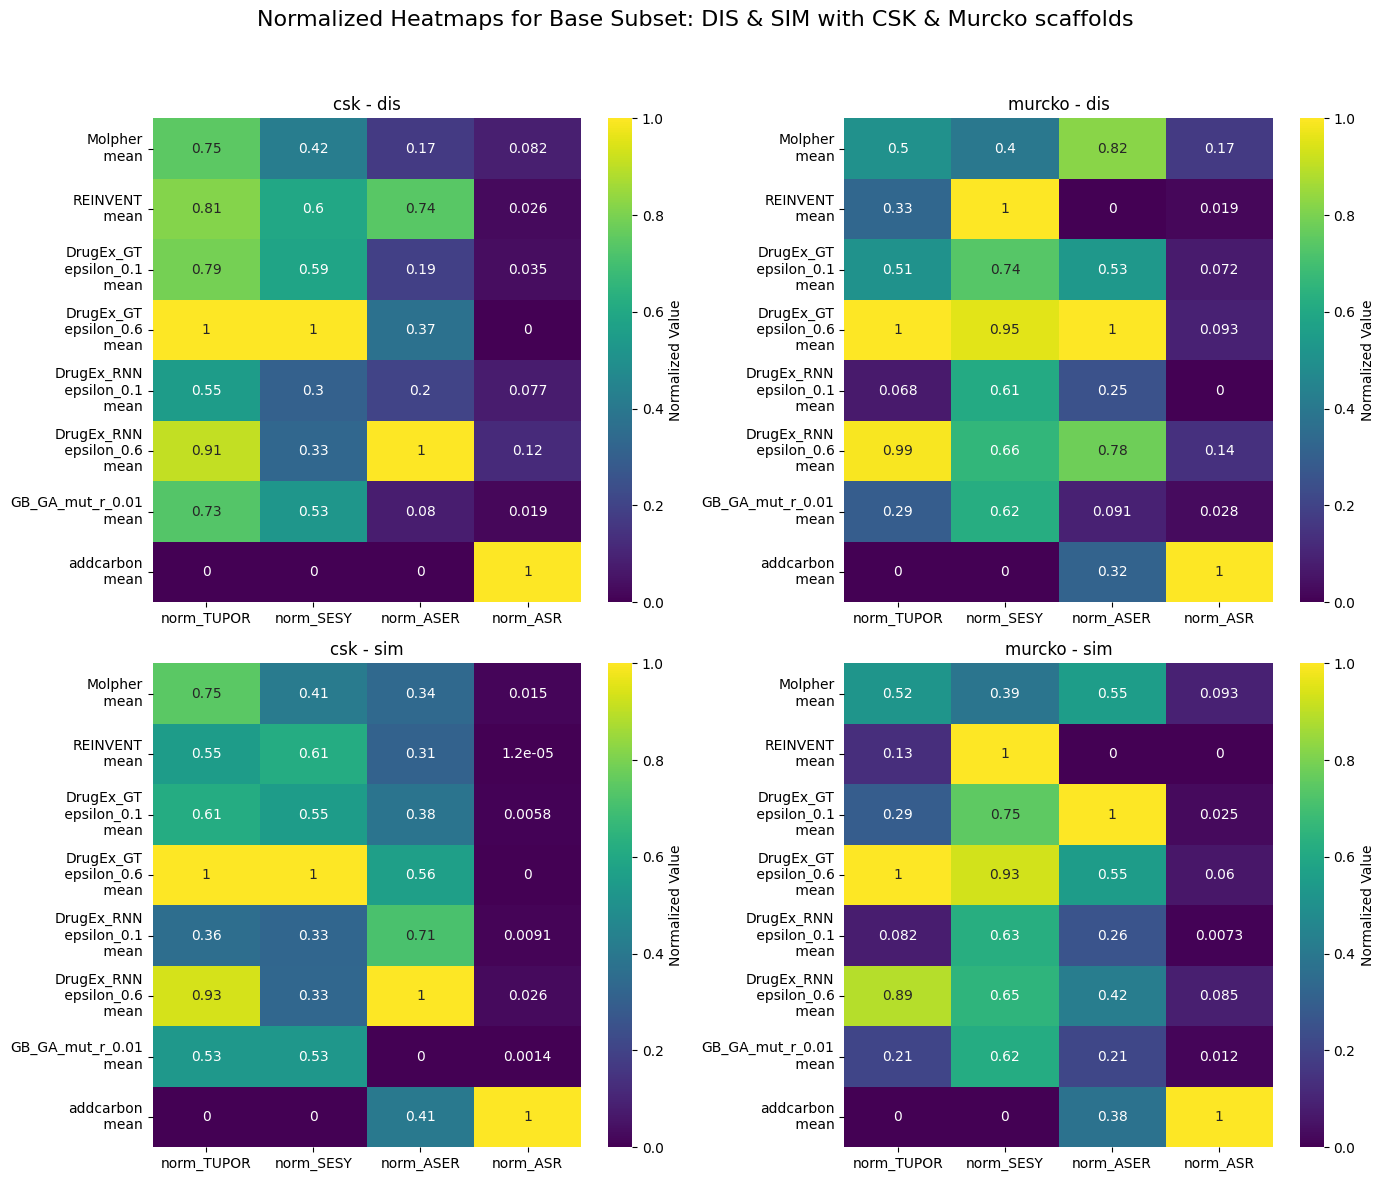

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Vytvoření figure pro subploty (2 řádky a 2 sloupce pro každý rozdělený graf)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2 řádky, 2 sloupce

# Iterace přes typy rozdělení (DIS, SIM) a scaffoldy (CSK, Murcko)
for i, type_split in enumerate(['dis', 'sim']):
    for j, scaf in enumerate(['csk', 'murcko']):
        # Načtení datového rámce pouze pro subset "base"
        df = pd.read_csv(f"data/results/Glucocorticoid_receptor/{scaf}_scaffolds/{type_split}/mean_{scaf}_{type_split}.csv")
        
        # Normalizace metrik
        df['norm_TUPOR'] = df['TUPOR'].apply(lambda x: (x - df['TUPOR'].min()) / (df['TUPOR'].max() - df['TUPOR'].min()))
        df['norm_SESY'] = df['SESY'].apply(lambda x: (x - df['SESY'].min()) / (df['SESY'].max() - df['SESY'].min()))
        df['norm_ASER'] = df['ASER'].apply(lambda x: (x - df['ASER'].min()) / (df['ASER'].max() - df['ASER'].min()))
        df['norm_ASR'] = df['ASR'].apply(lambda x: (x - df['ASR'].min()) / (df['ASR'].max() - df['ASR'].min()))
        
        # Výběr normalizovaných sloupců
        normalized_df = df[['norm_TUPOR', 'norm_SESY', 'norm_ASER', 'norm_ASR']]
        normalized_df.index = df.name.tolist()  # Použití názvů jako index
        
        # Výběr správného subplotu pro zobrazení
        ax = axes[i, j]  # Umístění v mřížce 2x2 pro různé kombinace (DIS, SIM) a (CSK, MURCKO)
        
        # Vykreslení heatmapy pro každý subset
        sns.heatmap(normalized_df, annot=True, cmap='viridis', cbar_kws={'label': 'Normalized Value'}, ax=ax)
        
        # Nastavení názvu s zalomením textu pro generátory a zmenšení písma
        ax.set_title(f'{scaf} - {type_split}', fontsize=12)

        # Zalomit názvy generátorů na ose Y
        new_labels = [label.get_text().replace('_epsilon', '\n epsilon').replace('_mean', '\n mean') for label in ax.get_yticklabels()]
        ax.set_yticklabels(new_labels, rotation=0, ha="right", fontsize=10)

# Přidání celkového názvu pro všechny heatmapy
fig.suptitle('Normalized Heatmaps for Base Subset: DIS & SIM with CSK & Murcko scaffolds', fontsize=16)

# Přizpůsobení rozložení a uložení obrázku
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Rezerva pro nadpis
plt.savefig(f'img/heat_mapa/heat_mapa_base_all.png')
plt.savefig(f"img/heat_mapa/heat_mapa_base_all.svg", format="svg")
plt.show()


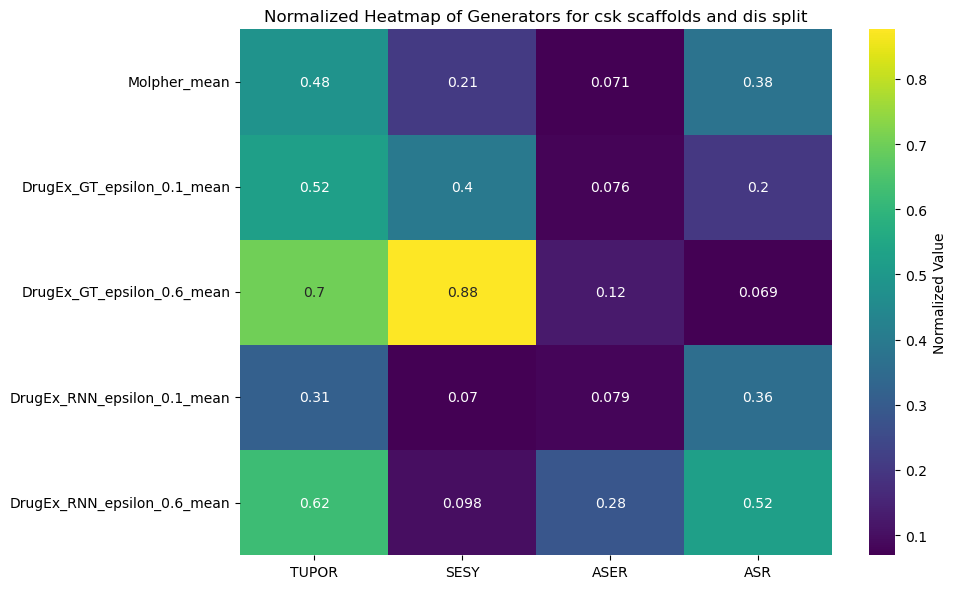

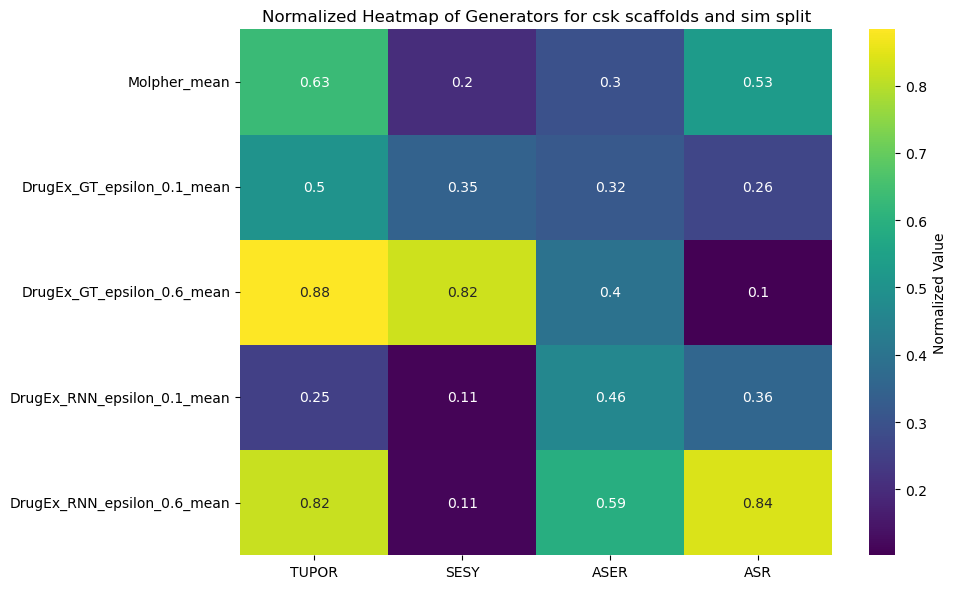

In [6]:
for type_split in ['dis', 'sim']:
    for scaf in ['csk']:
        for _ in ['']:
            df = pd.read_csv(f"data/results/Glucocorticoid_receptor/{scaf}_scaffolds/{type_split}/mean_{scaf}_{type_split}_norm_min_max{_}.csv")
            
            
            normalized_df = df[[ 'TUPOR', 'SESY', 'ASER', 'ASR']]
            normalized_df.index = df.name.tolist()
            
            
            plt.figure(figsize=(10, 6))
            sns.heatmap(normalized_df, annot=True, cmap='viridis', cbar_kws={'label': 'Normalized Value'})
            plt.title(f'Normalized Heatmap of Generators for {scaf} scaffolds and {type_split} split')
    
            plt.tight_layout()
            #plt.savefig(f'img/heat_mapa/heat_mapa_{type_split}_{scaf}_{_}.png')
            #plt.savefig(f"img/heat_mapa/heat_mapa_{type_split}_{scaf}_{_}.svg", format="svg")
            plt.show()
    

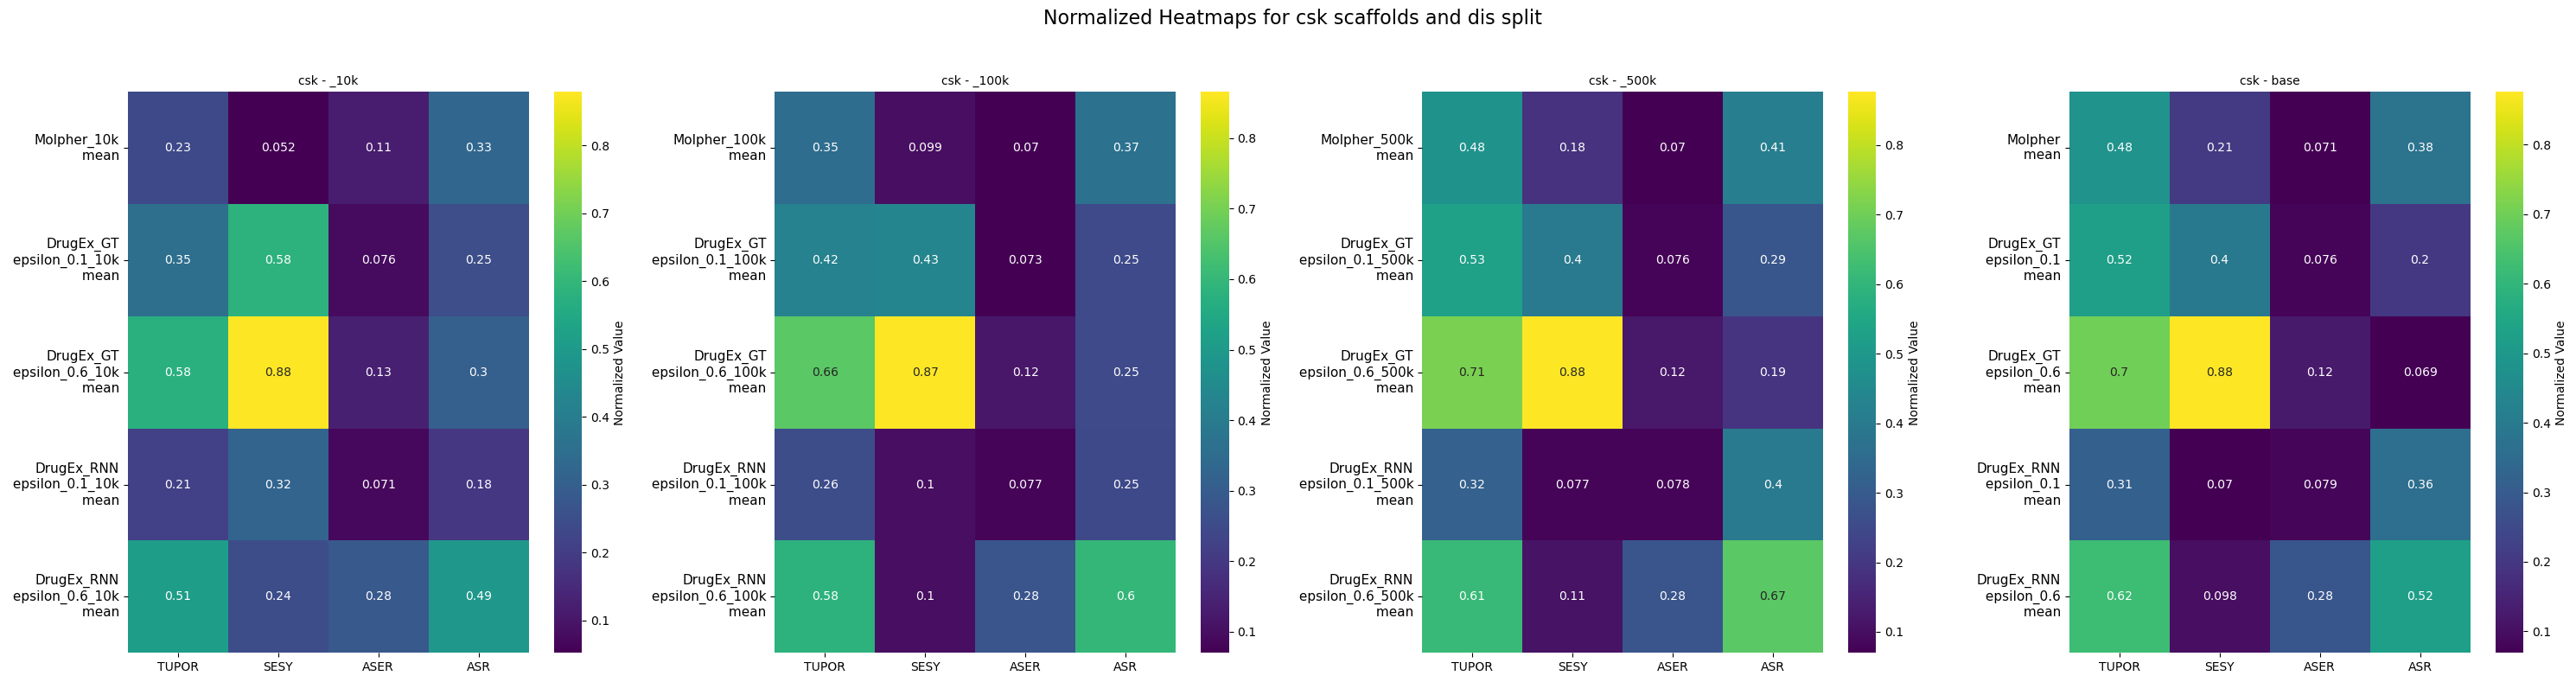

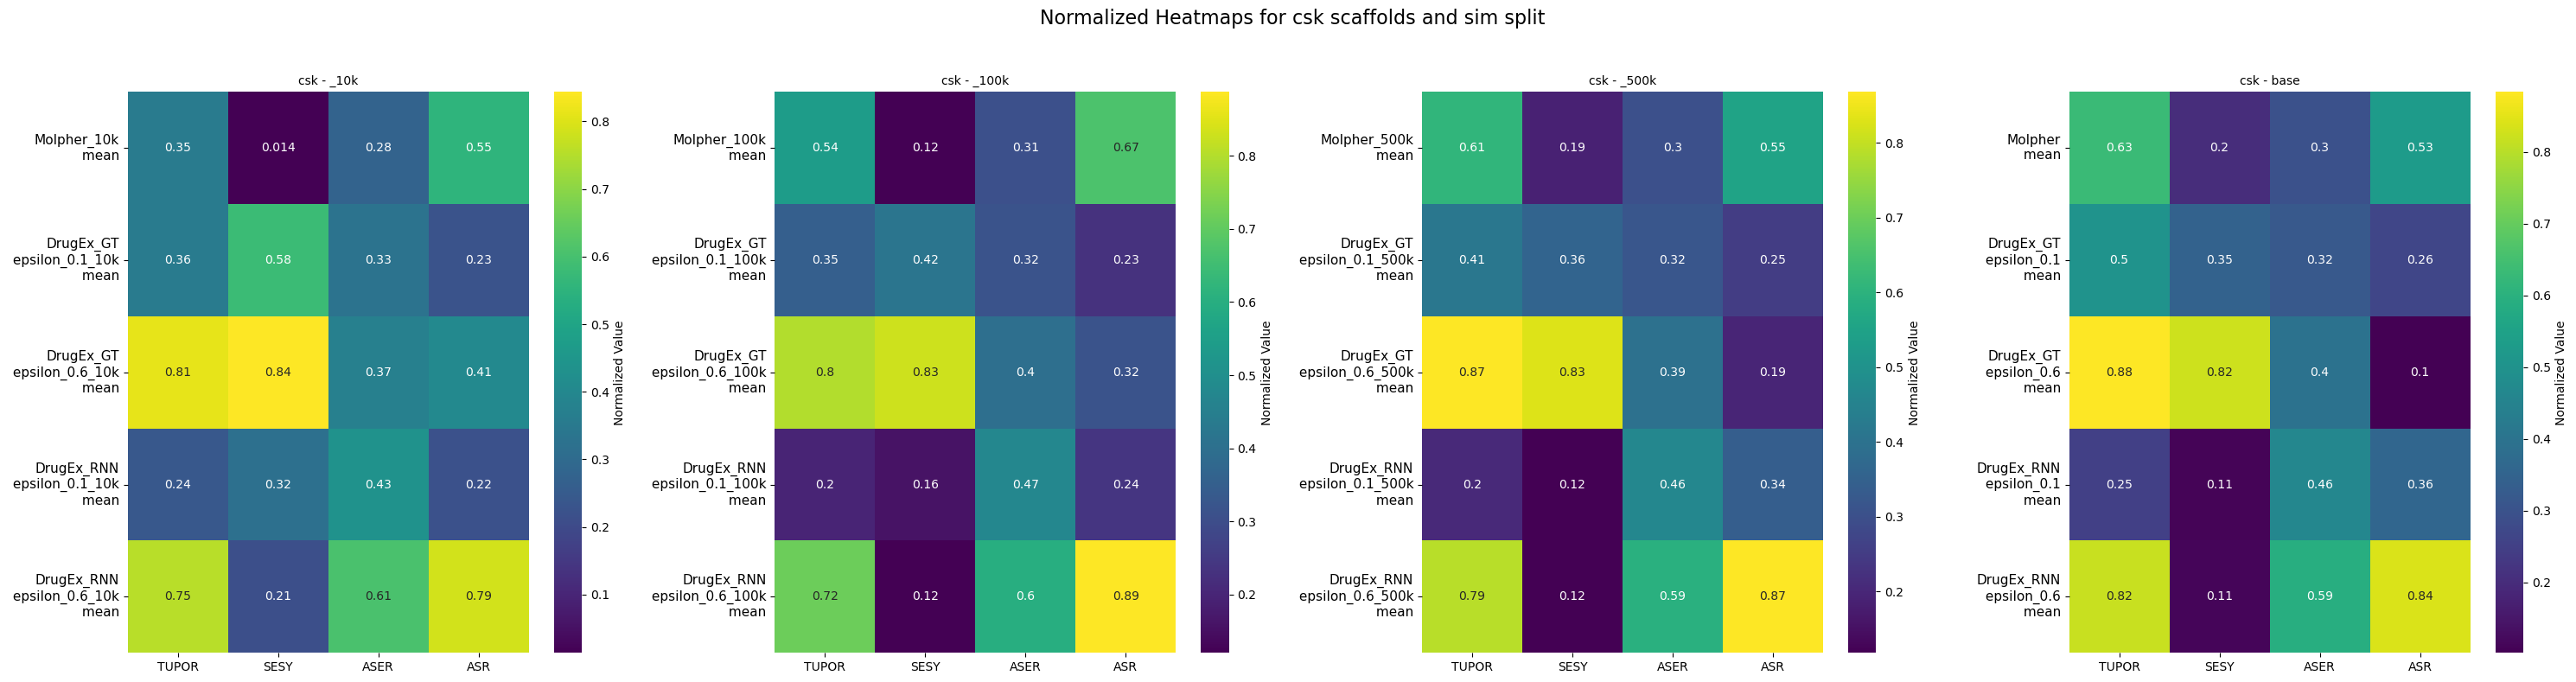

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Iterace přes typy rozdělení (DIS, SIM) a scaffoldy (CSK, Murcko)
for type_split in ['dis', 'sim']:
    for scaf in ['csk']:
        # Vytvoření figure pro subploty (1 řádek a 5 sloupců pro subsety)
        fig, axes = plt.subplots(1, 4, figsize=(30, 8))  # 1 řádek, 5 sloupců pro subsety

        # Iterace přes subsety (base, 1k, 10k, 100k, 500k)
        for k, subset in enumerate(['_10k', '_100k', '_500k', '']):
            # Načtení datového rámce
            df = pd.read_csv(f"data/results/Glucocorticoid_receptor/{scaf}_scaffolds/{type_split}/mean_{scaf}_{type_split}{subset}_norm_min_max.csv")
            
            # Normalizace metrik
            #df['norm_TUPOR'] = df['TUPOR'].apply(lambda x: (x - df['TUPOR'].min()) / (df['TUPOR'].max() - df['TUPOR'].min()))
            #df['norm_SESY'] = df['SESY'].apply(lambda x: (x - df['SESY'].min()) / (df['SESY'].max() - df['SESY'].min()))
            #df['norm_ASER'] = df['ASER'].apply(lambda x: (x - df['ASER'].min()) / (df['ASER'].max() - df['ASER'].min()))
            #df['norm_ASR'] = df['ASR'].apply(lambda x: (x - df['ASR'].min()) / (df['ASR'].max() - df['ASR'].min()))
            
            # Výběr normalizovaných sloupců
            normalized_df = df[['TUPOR', 'SESY', 'ASER', 'ASR']]
            normalized_df.index = df.name.tolist()  # Použití názvů jako index
            
            # Výběr správného subplotu pro zobrazení
            ax = axes[k]  # Umístění v mřížce 1x5 pro subsety (1 řádek, 5 sloupců)
            
            # Vykreslení heatmapy pro každý subset
            sns.heatmap(normalized_df, annot=True, cmap='viridis', cbar_kws={'label': 'Normalized Value'}, ax=ax)
            
            # Nastavení názvu s zalomením textu pro generátory a zmenšení písma
            ax.set_title(f'{scaf} - {subset if subset else "base"}', fontsize=10, wrap=True)

            # Zalomit názvy generátorů na ose Y
            new_labels = [label.get_text().replace('_epsilon', '\n epsilon').replace('_mean', '\n mean') for label in ax.get_yticklabels()]
            ax.set_yticklabels(new_labels, rotation=0, ha="right", fontsize=11)

        # Přidání celkového názvu pro rozdělení (DIS nebo SIM)
        fig.suptitle(f'Normalized Heatmaps for {scaf} scaffolds and {type_split} split', fontsize=16)
        
        # Přizpůsobení rozložení a uložení obrázku
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Rezerva pro nadpis
        #plt.savefig(f'img/heat_mapa/heat_mapa_{type_split}_{scaf}_1x5.png')
        #plt.savefig(f"img/heat_mapa/heat_mapa_{type_split}_{scaf}_1x5.svg", format="svg")
        #plt.show()


TUPOR    0.375691
SESY     0.414788
ASER     0.133172
ASR      0.309253
dtype: float64
                                 TUPOR   SESY   ASER    ASR
Molpher_10k_mean                 False  False   True   True
DrugEx_GT_epsilon_0.1_10k_mean    True  False   True   True
DrugEx_GT_epsilon_0.6_10k_mean   False  False   True   True
DrugEx_RNN_epsilon_0.1_10k_mean  False   True   True  False
DrugEx_RNN_epsilon_0.6_10k_mean  False  False  False  False
TUPOR    0.454772
SESY     0.319582
ASER     0.123360
ASR      0.341637
dtype: float64
                                  TUPOR   SESY   ASER    ASR
Molpher_100k_mean                 False  False   True   True
DrugEx_GT_epsilon_0.1_100k_mean    True  False   True   True
DrugEx_GT_epsilon_0.6_100k_mean   False  False   True   True
DrugEx_RNN_epsilon_0.1_100k_mean  False  False   True   True
DrugEx_RNN_epsilon_0.6_100k_mean  False  False  False  False
TUPOR    0.531454
SESY     0.329114
ASER     0.125971
ASR      0.391577
dtype: float64
             

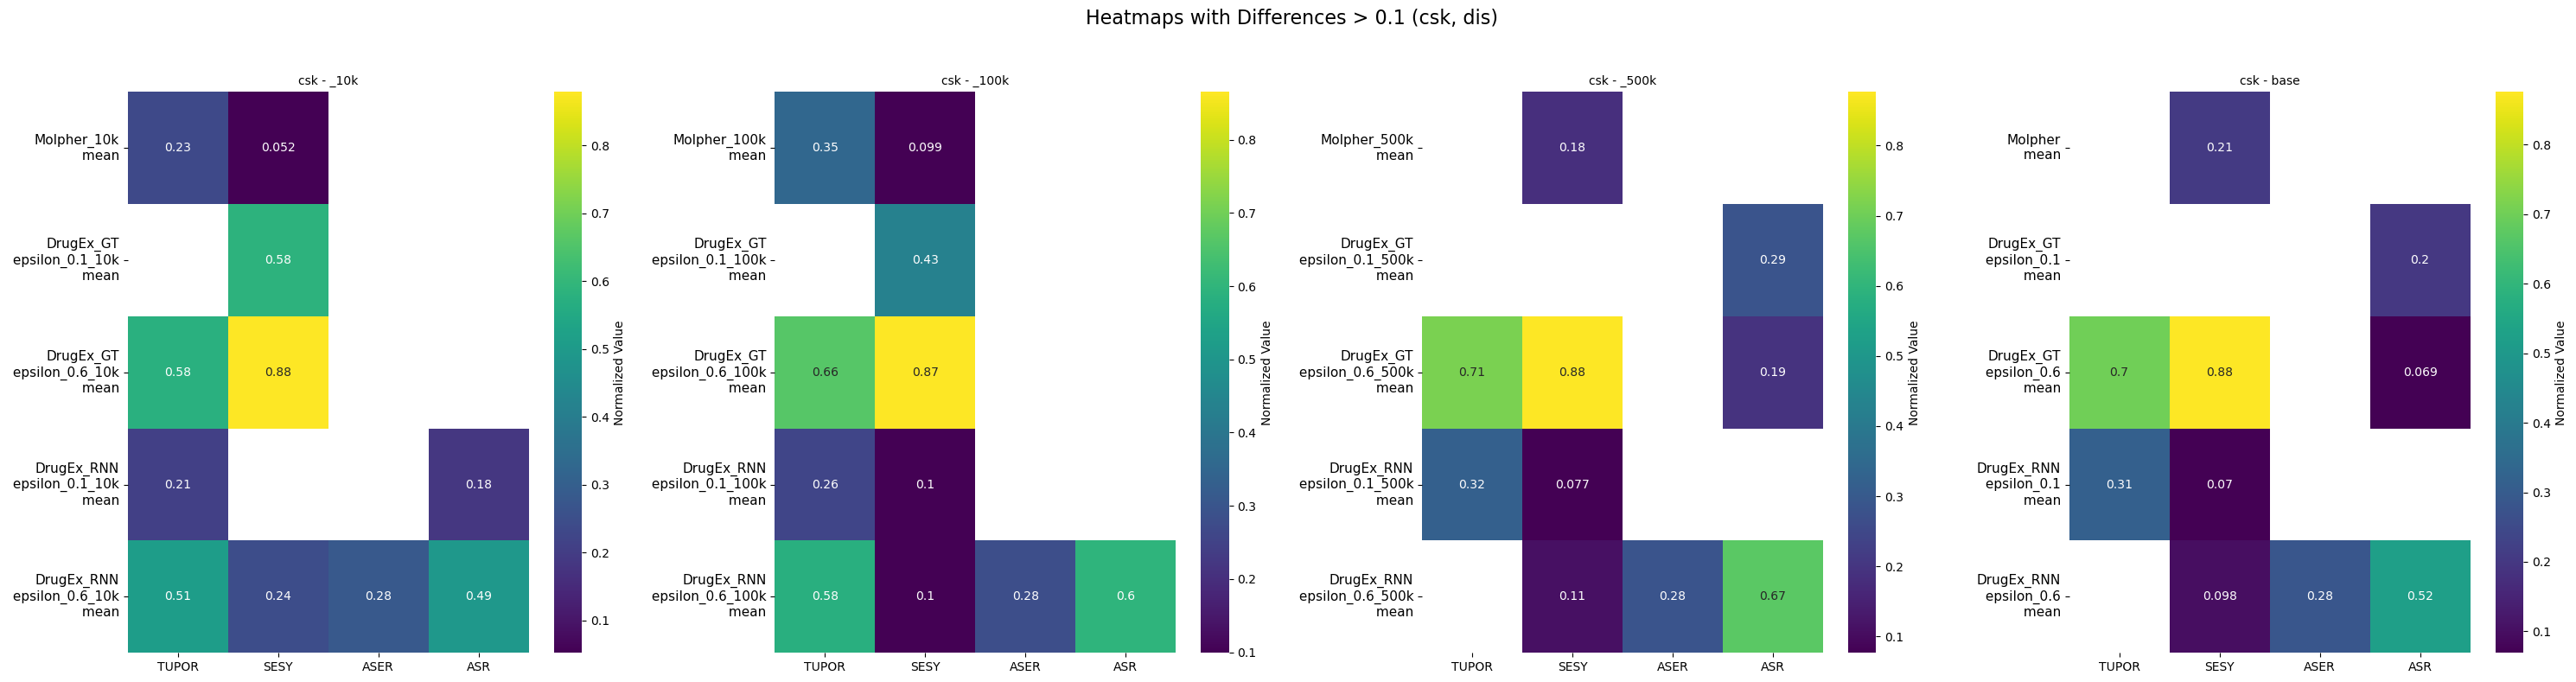

TUPOR    0.503364
SESY     0.393185
ASER     0.403595
ASR      0.437726
dtype: float64
                                 TUPOR   SESY   ASER    ASR
Molpher_10k_mean                 False  False  False  False
DrugEx_GT_epsilon_0.1_10k_mean   False  False   True  False
DrugEx_GT_epsilon_0.6_10k_mean   False  False   True   True
DrugEx_RNN_epsilon_0.1_10k_mean  False   True   True  False
DrugEx_RNN_epsilon_0.6_10k_mean  False  False  False  False
TUPOR    0.520073
SESY     0.329476
ASER     0.419244
ASR      0.467937
dtype: float64
                                  TUPOR   SESY   ASER    ASR
Molpher_100k_mean                  True  False  False  False
DrugEx_GT_epsilon_0.1_100k_mean   False   True  False  False
DrugEx_GT_epsilon_0.6_100k_mean   False  False   True  False
DrugEx_RNN_epsilon_0.1_100k_mean  False  False   True  False
DrugEx_RNN_epsilon_0.6_100k_mean  False  False  False  False
TUPOR    0.575914
SESY     0.321552
ASER     0.414298
ASR      0.440857
dtype: float64
             

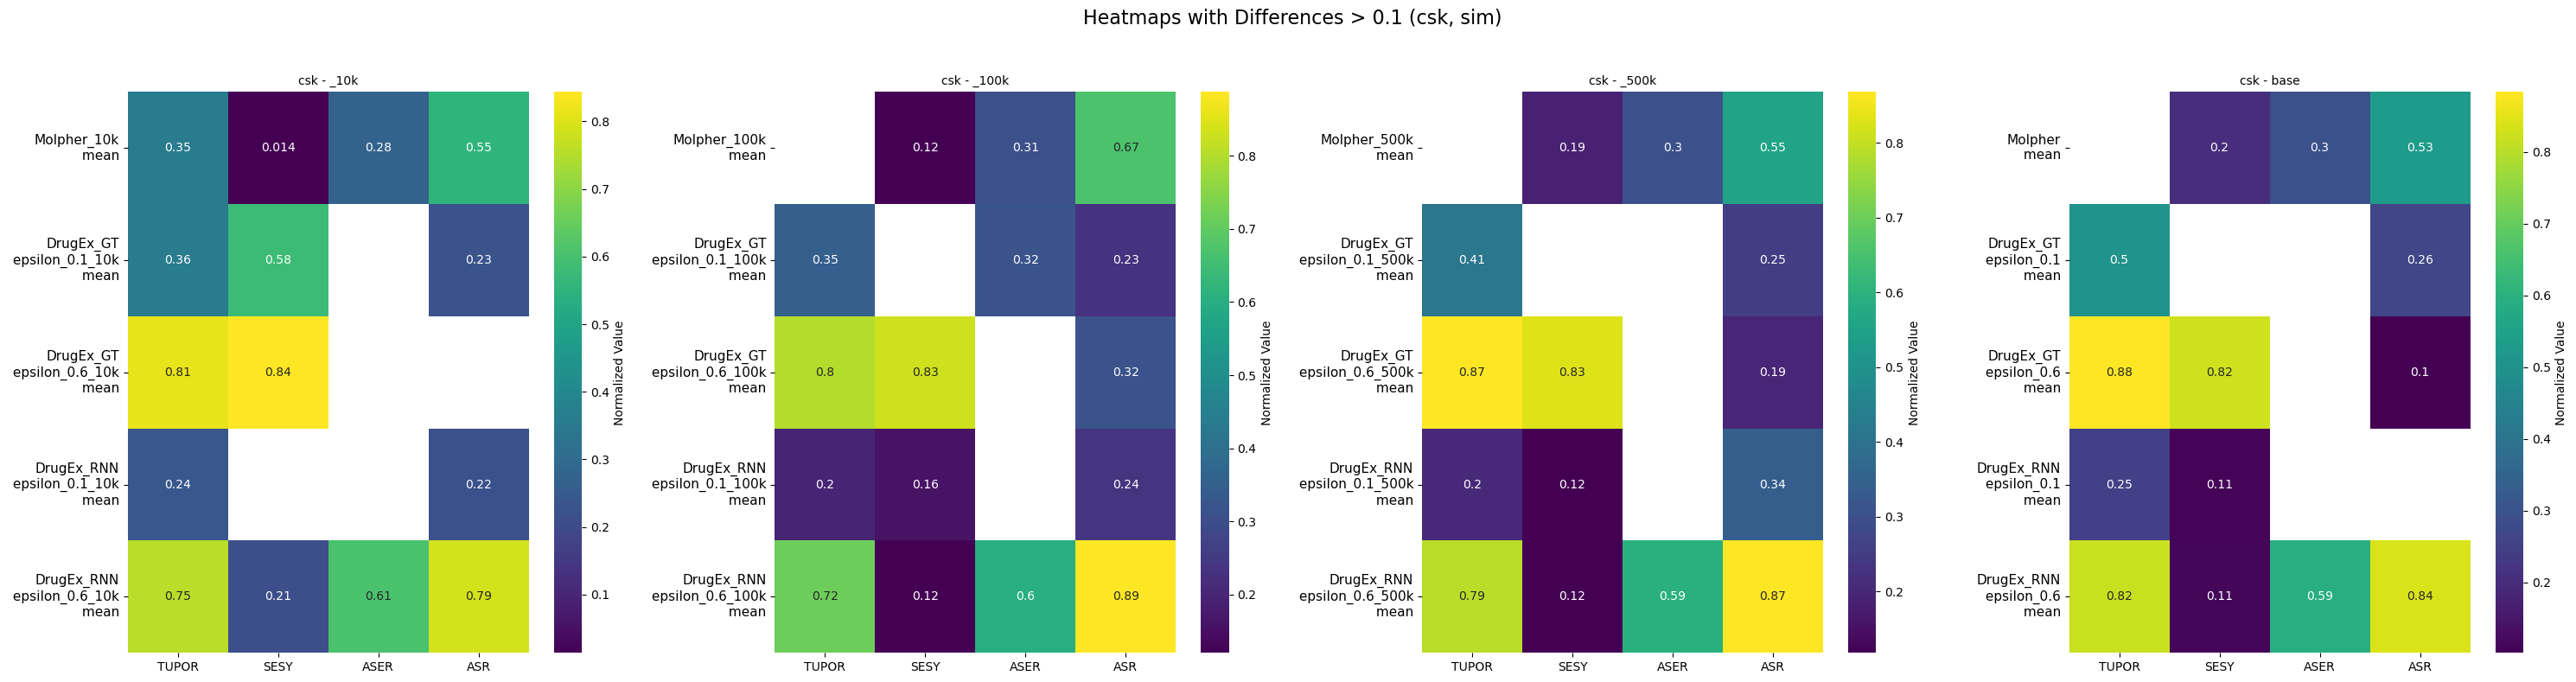

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Iterace přes typy rozdělení (DIS, SIM) a scaffoldy (CSK, Murcko)
for type_split in ['dis', 'sim']:
    for scaf in ['csk']:
        # Vytvoření figure pro subploty (1 řádek a 4 sloupce pro subsety)
        fig, axes = plt.subplots(1, 4, figsize=(30, 8))  # 1 řádek, 4 sloupce pro subsety

        # Iterace přes subsety (base, 10k, 100k, 500k)
        for k, subset in enumerate(['_10k', '_100k', '_500k', '']):
            # Načtení datového rámce
            df = pd.read_csv(f"data/results/Glucocorticoid_receptor/{scaf}_scaffolds/{type_split}/mean_{scaf}_{type_split}{subset}_norm_min_max.csv")
            
            # Výběr pouze metrik
            normalized_df = df[['TUPOR', 'SESY', 'ASER', 'ASR']]
            normalized_df.index = df.name.tolist()  # Použití názvů jako index
            
            # Spočítání průměrných hodnot pro každou metrikou kolonku
            mean_values = normalized_df.mean()
            print(mean_values)
            # Vytvoření masky: True pro hodnoty, které jsou v toleranci ±0.1
            mask = np.abs(normalized_df - mean_values) < 0.1
            print(mask)
            # Výběr subplotu
            ax = axes[k]  
            
            # Vykreslení heatmapy s maskou (skryje hodnoty pod threshold)
            sns.heatmap(normalized_df, annot=True, cmap='viridis', cbar_kws={'label': 'Normalized Value'}, ax=ax, mask=mask)

            # Nastavení názvu pro subset
            ax.set_title(f'{scaf} - {subset if subset else "base"}', fontsize=10, wrap=True)

            # Zalamování názvů generátorů
            new_labels = [label.get_text().replace('_epsilon', '\n epsilon').replace('_mean', '\n mean') for label in ax.get_yticklabels()]
            ax.set_yticklabels(new_labels, rotation=0, ha="right", fontsize=11)

        # Přidání celkového názvu
        fig.suptitle(f'Heatmaps with Differences > 0.1 ({scaf}, {type_split})', fontsize=16)
        
        # Přizpůsobení rozložení
        plt.tight_layout(rect=[0, 0, 1, 0.95])  
        plt.show()


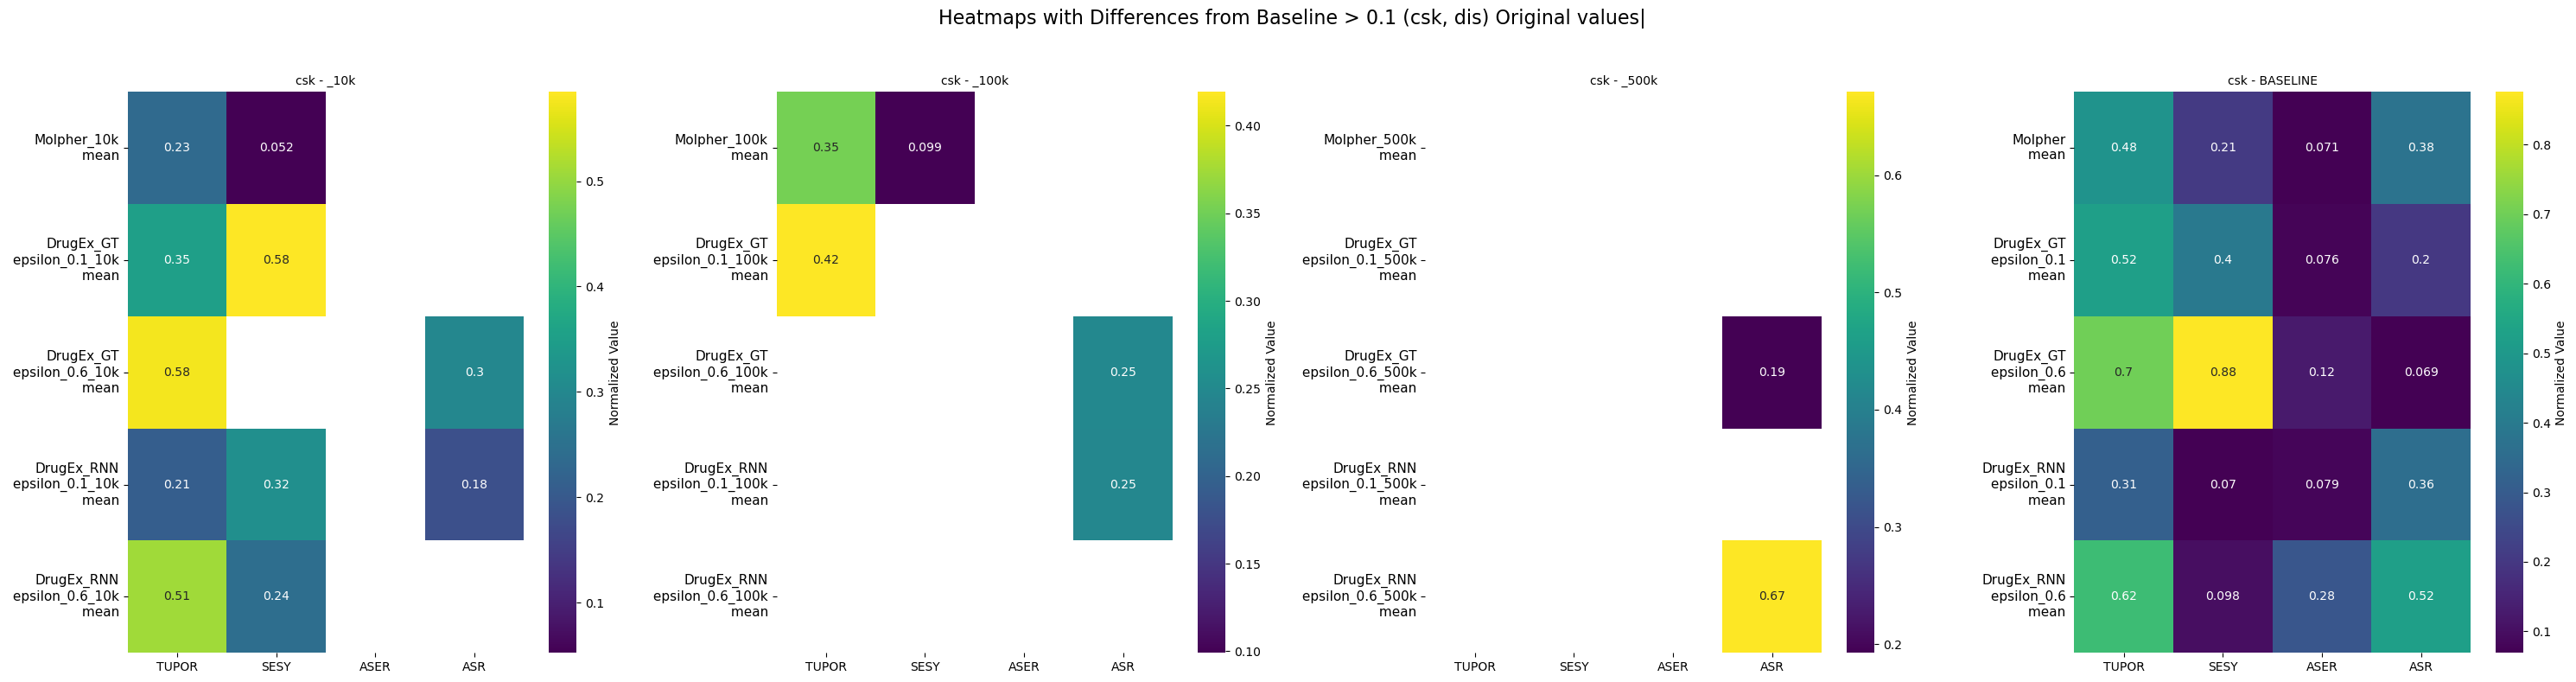

/home/filv/.conda/envs/env/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/filv/.conda/envs/env/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


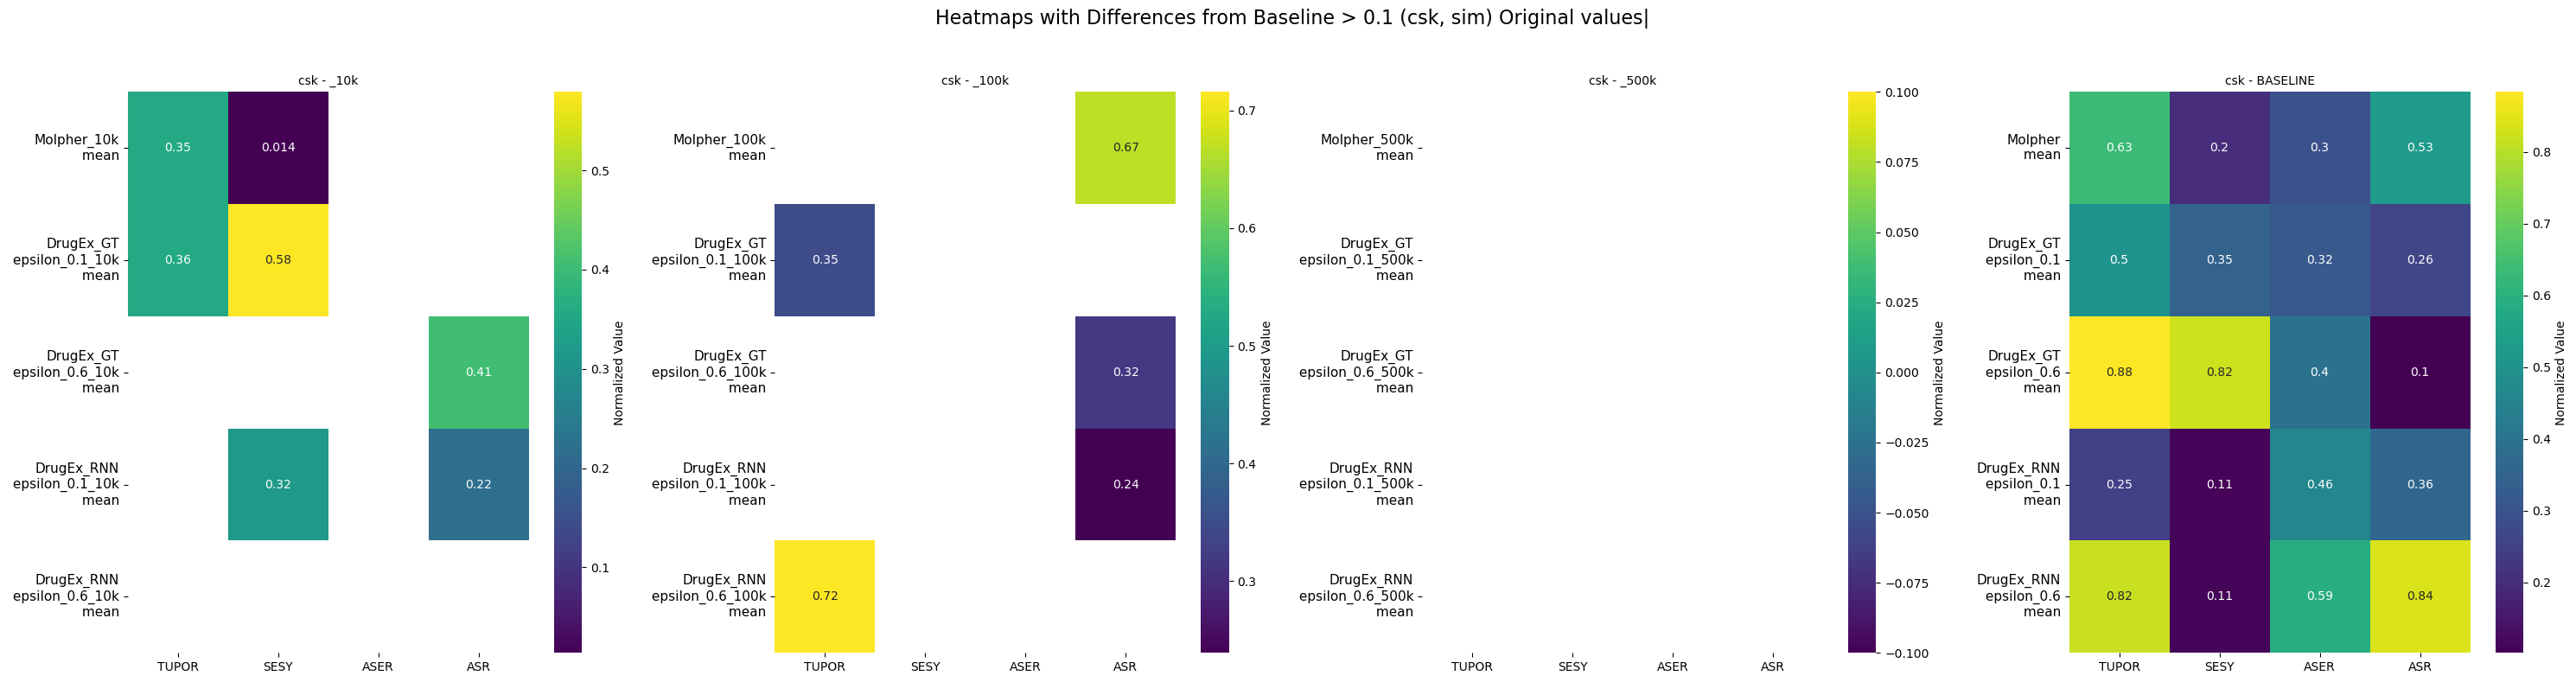

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Iterace přes typy rozdělení (DIS, SIM) a scaffoldy (CSK, Murcko)
for type_split in ['dis', 'sim']:
    for scaf in ['csk']:
        # Vytvoření figure pro subploty (1 řádek a 4 sloupce pro subsety)
        fig, axes = plt.subplots(1, 4, figsize=(30, 8))  # 1 řádek, 4 sloupce pro subsety

        # Načtení baseline subsetu (poslední subset "")
        df_baseline = pd.read_csv(f"data/results/Glucocorticoid_receptor/{scaf}_scaffolds/{type_split}/mean_{scaf}_{type_split}_norm_min_max.csv")
        baseline_df = df_baseline[['TUPOR', 'SESY', 'ASER', 'ASR']]
        baseline_df.index = df_baseline.name.tolist()

        # Iterace přes subsety (10k, 100k, 500k, base)
        for k, subset in enumerate(['_10k', '_100k', '_500k', '']):
            # Načtení datového rámce
            df = pd.read_csv(f"data/results/Glucocorticoid_receptor/{scaf}_scaffolds/{type_split}/mean_{scaf}_{type_split}{subset}_norm_min_max.csv")
            normalized_df = df[['TUPOR', 'SESY', 'ASER', 'ASR']]
            normalized_df.index = df.name.tolist()

            # **Zajištění, že baseline a current subset mají stejné pořadí indexů a sloupců**
            baseline_df = baseline_df.set_index(normalized_df.index)
            # Výběr subplotu
            ax = axes[k]  

            # Pro baseline zobrazíme všechny hodnoty, pro ostatní subsety aplikujeme masku
            if subset == '':
                mask = np.zeros_like(normalized_df, dtype=bool)  # Žádné maskování (vše zobrazit)
            else:

                mask = np.abs(normalized_df - baseline_df) < 0.1  # Maskování hodnot blízkých baseline

            normalized_df.index = df.name.tolist()

            # Vykreslení heatmapy s maskou
            sns.heatmap(normalized_df, annot=True, cmap='viridis', cbar_kws={'label': 'Normalized Value'}, ax=ax, mask=mask)

            # Nastavení názvu pro subset
            ax.set_title(f'{scaf} - {subset if subset else "BASELINE"}', fontsize=10, wrap=True)

            # Zalamování názvů generátorů
            new_labels = [label.get_text().replace('_epsilon', '\n epsilon').replace('_mean', '\n mean') for label in ax.get_yticklabels()]
            ax.set_yticklabels(new_labels, rotation=0, ha="right", fontsize=11)

        # Přidání celkového názvu
        fig.suptitle(f'Heatmaps with Differences from Baseline > 0.1 ({scaf}, {type_split}) Original values', fontsize=16)
        
        # Přizpůsobení rozložení
        plt.tight_layout(rect=[0, 0, 1, 0.95])  
        plt.show()


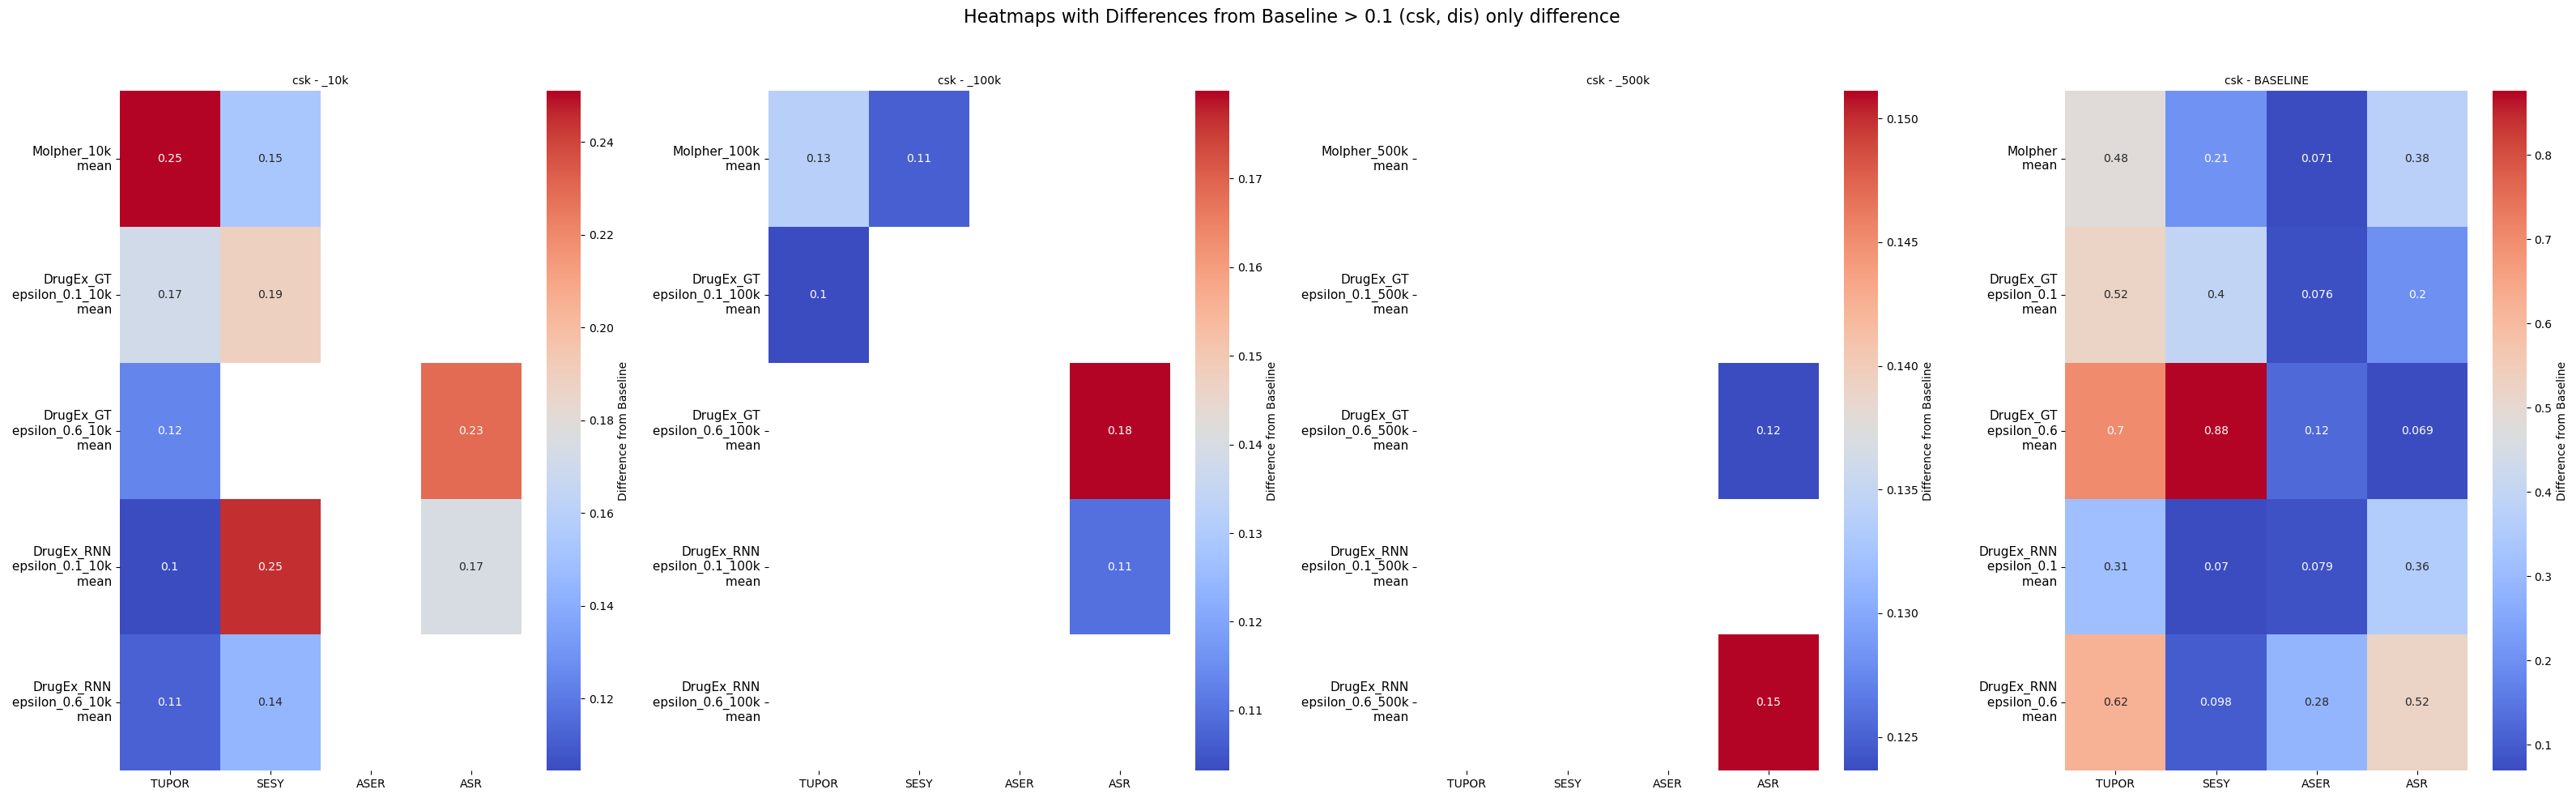

/home/filv/.conda/envs/env/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/filv/.conda/envs/env/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


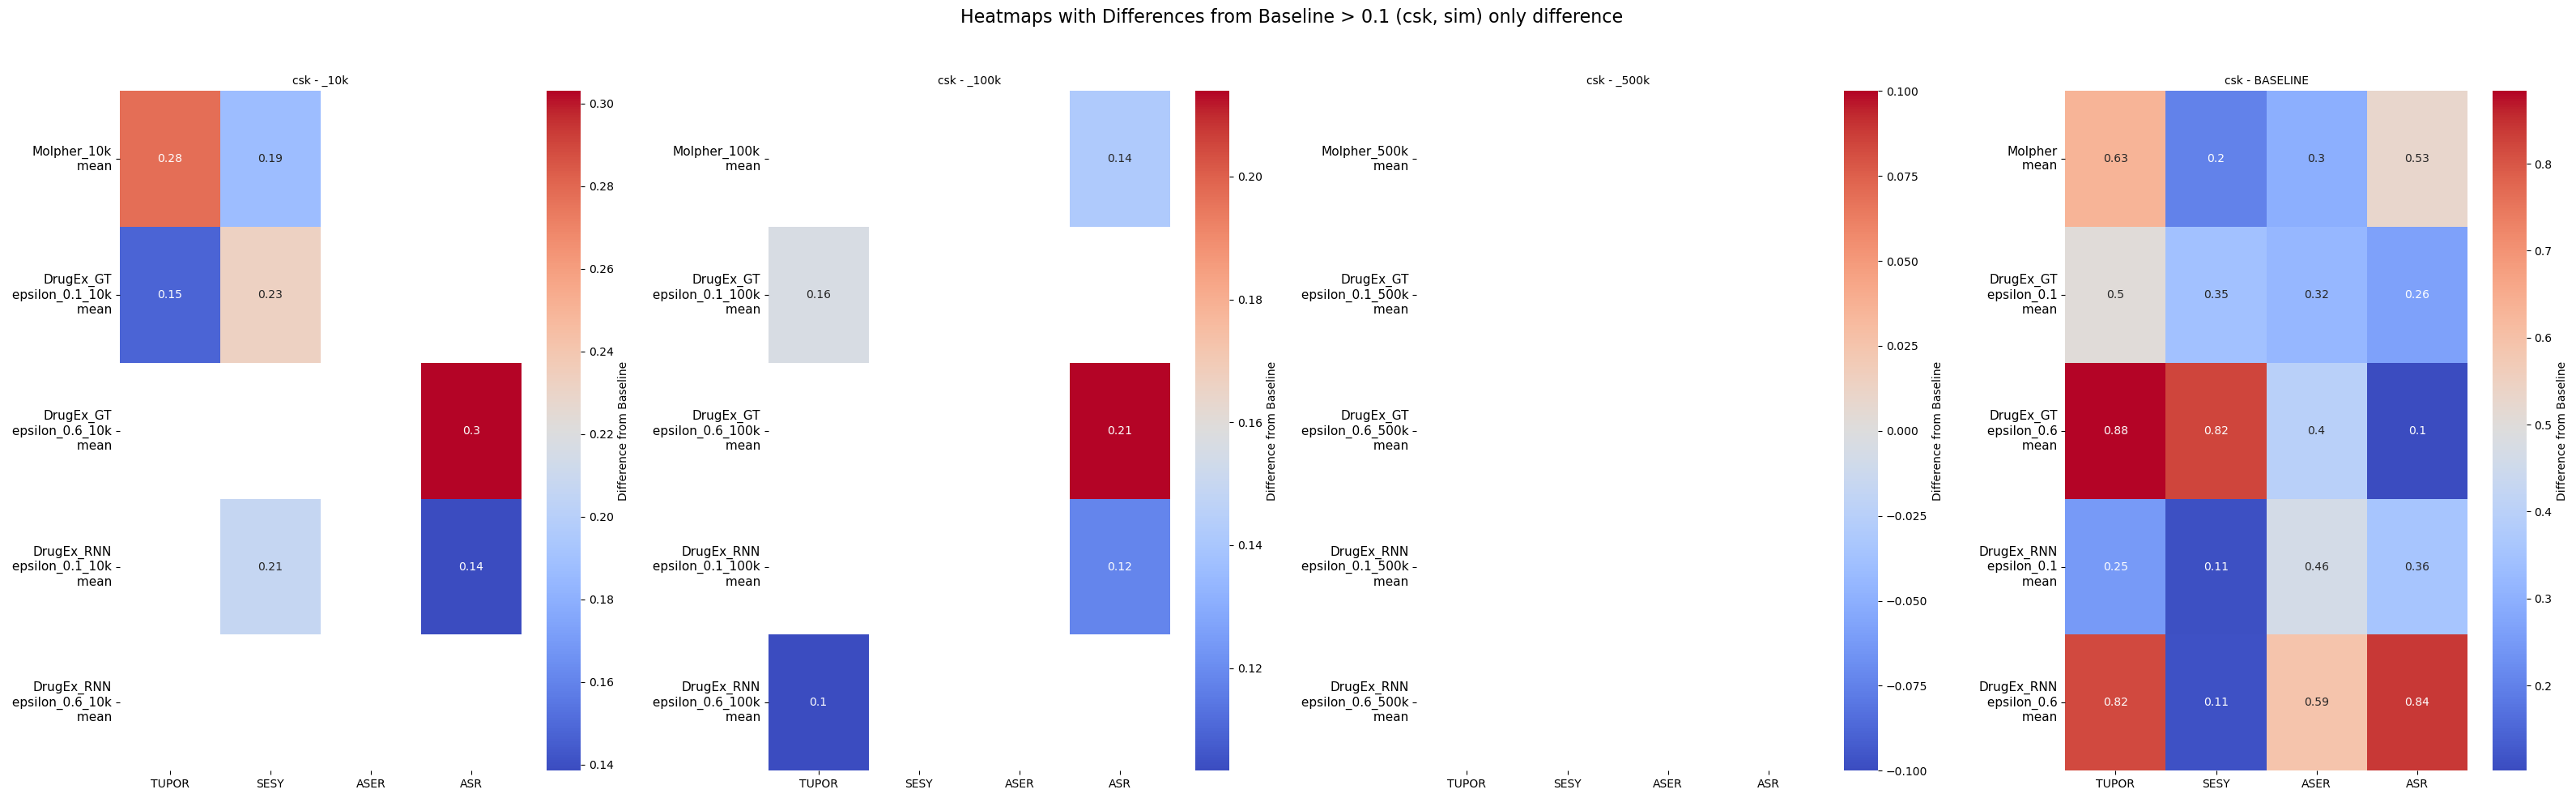

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Iterace přes typy rozdělení (DIS, SIM) a scaffoldy (CSK, Murcko)
for type_split in ['dis', 'sim']:
    for scaf in ['csk']:
        # Vytvoření figure pro subploty (1 řádek a 4 sloupce pro subsety)
        fig, axes = plt.subplots(1, 4, figsize=(32, 10))  # 1 řádek, 4 sloupce pro subsety

        # Načtení baseline subsetu (poslední subset "")
        df_baseline = pd.read_csv(f"data/results/Glucocorticoid_receptor/{scaf}_scaffolds/{type_split}/mean_{scaf}_{type_split}_norm_min_max.csv")
        baseline_df = df_baseline[['TUPOR', 'SESY', 'ASER', 'ASR']]
        baseline_df.index = df_baseline.name.tolist()

        # Iterace přes subsety (10k, 100k, 500k, base)
        for k, subset in enumerate(['_10k', '_100k', '_500k', '']):
            # Načtení datového rámce
            df = pd.read_csv(f"data/results/Glucocorticoid_receptor/{scaf}_scaffolds/{type_split}/mean_{scaf}_{type_split}{subset}_norm_min_max.csv")
            normalized_df = df[['TUPOR', 'SESY', 'ASER', 'ASR']]
            normalized_df.index = df.name.tolist()

            # **Zajištění, že baseline a current subset mají stejné pořadí indexů a sloupců**
            baseline_df = baseline_df.set_index(normalized_df.index)
            
            # Výběr subplotu
            ax = axes[k]  

            # Pro baseline zobrazíme všechny hodnoty, pro ostatní subsety aplikujeme masku
            if subset == '':
                mask = np.zeros_like(normalized_df, dtype=bool)  # Žádné maskování (vše zobrazit)
                diff_df = baseline_df  # Pro BASELINE zobrazíme hodnoty bez rozdílu
            else:
                mask = np.abs(normalized_df - baseline_df) <= 0.1  # Maskování hodnot blízkých baseline (rozdíl <= 0.1)
                diff_df = np.abs(normalized_df - baseline_df)  # Vytvoření nového DataFrame s rozdíly mezi hodnotami

                # Nastavení hodnot, které jsou menší než 0.1, na NaN (aby nebyly zobrazeny)
                diff_df[mask] = np.nan  

            # Vykreslení heatmapy s rozdíly (jen hodnoty, které se liší více než 0.1)
            sns.heatmap(diff_df, annot=True, cmap='coolwarm', cbar_kws={'label': 'Difference from Baseline'}, ax=ax)

            # Nastavení názvu pro subset
            ax.set_title(f'{scaf} - {subset if subset else "BASELINE"}', fontsize=10, wrap=True)

            # Zalamování názvů generátorů
            new_labels = [label.get_text().replace('_epsilon', '\n epsilon').replace('_mean', '\n mean') for label in ax.get_yticklabels()]
            ax.set_yticklabels(new_labels, rotation=0, ha="right", fontsize=11)

        # Přidání celkového názvu
        fig.suptitle(f'Heatmaps with Differences from Baseline > 0.1 ({scaf}, {type_split}) only difference', fontsize=16)
        
        # Přizpůsobení rozložení
        plt.tight_layout(rect=[0, 0, 1, 0.95])  
        plt.show()
